## Mini Project Rakamin Academy <br>

## Mini Project Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## Create By  : Mohd Fauzan Heryka Putra 

---- 

# Project Outline : 
- Overview 
- Goal
- Objective
- Import Library
- Load Dataset 
- Data Exploration
- Data Cleansing
- EDA
- Data Preprocessing
- Modeling 
- Business Recomendation

## Overview

When a business understands the personality and behavior of its clients, it may grow quickly and offer better services and perks to clients who have the potential to stick around. Our goal is to develop a cluster prediction model using this data insight to assist businesses in making decisions by analyzing past marketing campaign data to enhance performance and target the appropriate clients so they may transact on the platform

## Goal
The goal of analyzing customer profiles and behavior with a clustering approach is to understand customers better, provide more personalized service, improve sales performance, and build strong relationships with customers.

## Objective
Develop a machine learning model that can classify consumers into several groups according to their traits and actions.
Gain greater understanding of the behavior and profiles of your customers.
utilizing the results of clustering to identify profitable business strategies.

In [1]:
# library dataset &visual 
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib as mpl

# modeling
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer

# add on
from IPython.display import Image
import datetime
import warnings
warnings.filterwarnings('ignore')
#sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("darkgrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("marketing_campaign_data.csv")
df.sample()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1569,1569,1081,1957,S3,Menikah,75283000.0,1,2,27-03-2013,26,...,4,0,0,0,0,0,0,3,11,0


## Data Exploration

In [4]:
pd.set_option('display.max_colwidth',2)
# data uniq di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col,round(df[col].isnull().sum()/len(df[col]) *100,2),df[col].dtype,df[col].nunique(), df[col].unique()])

overview = pd.DataFrame(columns=['Column Name','Missing Percentage(%)','Data Type' ,'Number of Unique', 'Unique Sample'],
                     data=listItem)
overview

,Column Name,Missing Percentage(%),Data Type,Number of Unique,Unique Sample
0,Unnamed: 0,0.00,int64,2240,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,ID,0.00,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
2,Year_Birth,0.00,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
3,Education,0.00,object,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,0.00,object,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda, Duda]"
5,Income,1.07,float64,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0, 62513000.0, 55635000.0, 33454000.0, 30351000.0, 5648000.0, nan, 7500000.0, 63033000.0, 59354000.0, 17323000.0, 82800000.0, 41850000.0, 37760000.0, 76995000.0, 33812000.0, 37040000.0, 2447000.0, 58607000.0, 65324000.0, 40689000.0, 18589000.0, 53359000.0, 38360000.0, 84618000.0, 10979000.0, 38620000.0, 40548000.0, 46610000.0, 68657000.0, 49389000.0, 67353000.0, 23718000.0, 42429000.0, 48948000.0, 80011000.0, 20559000.0, 21994000.0, 79941000.0, 41728000.0, 72550000.0, 65486000.0, 79143000.0, 35790000.0, 82582000.0, 66373000.0, 82384000.0, 70287000.0, 27938000.0, 55954000.0, 75777000.0, 66653000.0, 61823000.0, 67680000.0, 70666000.0, 25721000.0, 32474000.0, 88194000.0, 69096000.0, 74854000.0, 66991000.0, 65031000.0, 60631000.0, 28332000.0, 40246000.0, 75251000.0, 75825000.0, 26326000.0, 56046000.0, 29760000.0, 26304000.0, 23559000.0, 81361000.0, 29440000.0, 36138000.0, 50388000.0, 79593000.0, 54178000.0, 42394000.0, 23626000.0, 30096000.0, 47916000.0, 51813000.0, 78497000.0, 50150000.0, 47823000.0, 34554000.0, 85693000.0, 65846000.0, 87195000.0, 24594000.0, 49096000.0, 52413000.0, 38557000.0, 89058000.0, 77298000.0, ...]"
6,Kidhome,0.00,int64,3,"[0, 1, 2]"
7,Teenhome,0.00,int64,3,"[0, 1, 2]"
8,Dt_Customer,0.00,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 1

In [5]:
df.duplicated(subset="ID").sum()

0

## Descriptive Statistic

In [7]:
display(df.describe().T, df.describe(include= "object"))

,count,mean,std,min,25%,50%,75%,max
unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
id,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
mntcoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
mntfruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
mntmeatproducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


,education,marital_status,dt_customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


## Interpretation
- Overall this dataset has 2240 rows and 30 columns
- most customer joined in 31 september 2012
- most customer is married 
- the year of birth starting from 1893 has been indicated as an outlier, so handling will be carried out to avoid inequality, because the average customer was born in 1960

## Change Data Type
- changed the `dt_customer` column to datetime
- changed the `income` column to int so that it becomes a compact number

## Handling missing value 
- drop null `income` because it's only 1% null value

## Drop columns 
- drop column  `unamed 0` because already have id column

## Duplicated data
- this dataset have no duplicate value


In [3]:
# lower case all columns
for i in df.columns:
    lower = i.lower()  
    df.rename(columns={i: lower}, inplace=True)  

df.columns

Index(['unnamed: 0', 'id', 'year_birth', 'education', 'marital_status',
       'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntcoke',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

## Data Cleansing

In [4]:
df1 = df.copy()
# drop columns and drop null
df1 = df1.drop("unnamed: 0", axis= 1)
df1 = df1.dropna()

# change datatype
df1['dt_customer'] = pd.to_datetime(df1['dt_customer'], format= "%d-%m-%Y")
df1['income'] = df1.income.astype("int64")
df1.info()

# change value lajang,duda, janda, Divorce to single because it's the same meaning
df1.marital_status.replace(["Lajang", "Janda", "Duda","Cerai"], "Single", inplace= True)
df1.marital_status.value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2216 non-null   int64         
 1   year_birth           2216 non-null   int64         
 2   education            2216 non-null   object        
 3   marital_status       2216 non-null   object        
 4   income               2216 non-null   int64         
 5   kidhome              2216 non-null   int64         
 6   teenhome             2216 non-null   int64         
 7   dt_customer          2216 non-null   datetime64[ns]
 8   recency              2216 non-null   int64         
 9   mntcoke              2216 non-null   int64         
 10  mntfruits            2216 non-null   int64         
 11  mntmeatproducts      2216 non-null   int64         
 12  mntfishproducts      2216 non-null   int64         
 13  mntsweetproducts     2216 non-null   i

marital_status
Menikah        857
Single         786
Bertunangan    573
Name: count, dtype: int64

## EDA

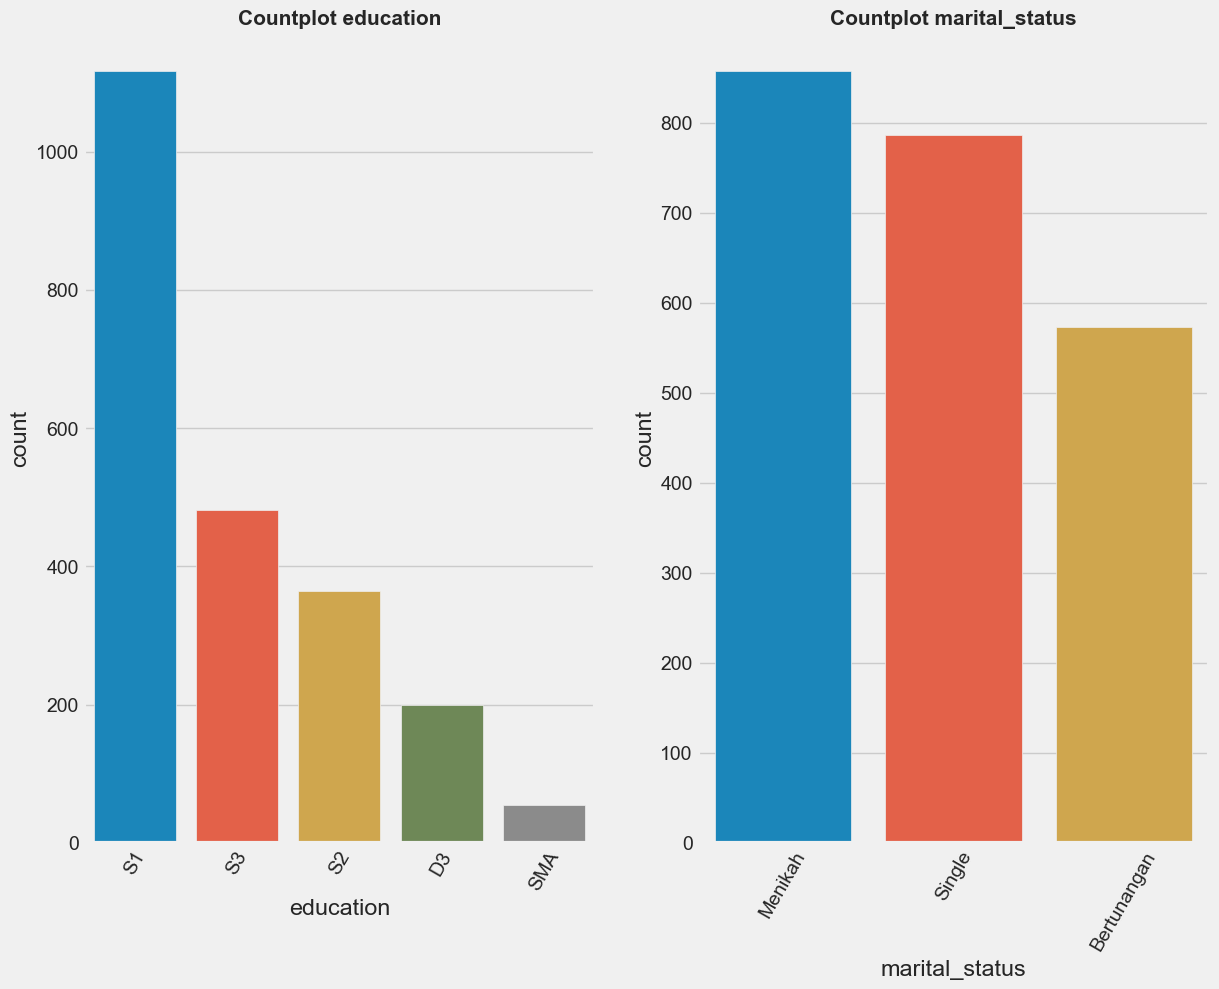

In [21]:
# check categorical distribution
kat = list(df1.select_dtypes("object"))

plt.figure(figsize=(20, 10))
for i in range (0, len(kat)):
  plt.subplot(math.ceil(len(kat)/3),3, i+1)
  sns.countplot(x=df1[kat[i]], order = df1[kat[i]].value_counts().index)
  plt.title('Countplot {}'.format(kat[i]), fontsize = 15 , fontweight = "bold")
  plt.xticks(rotation = 60)

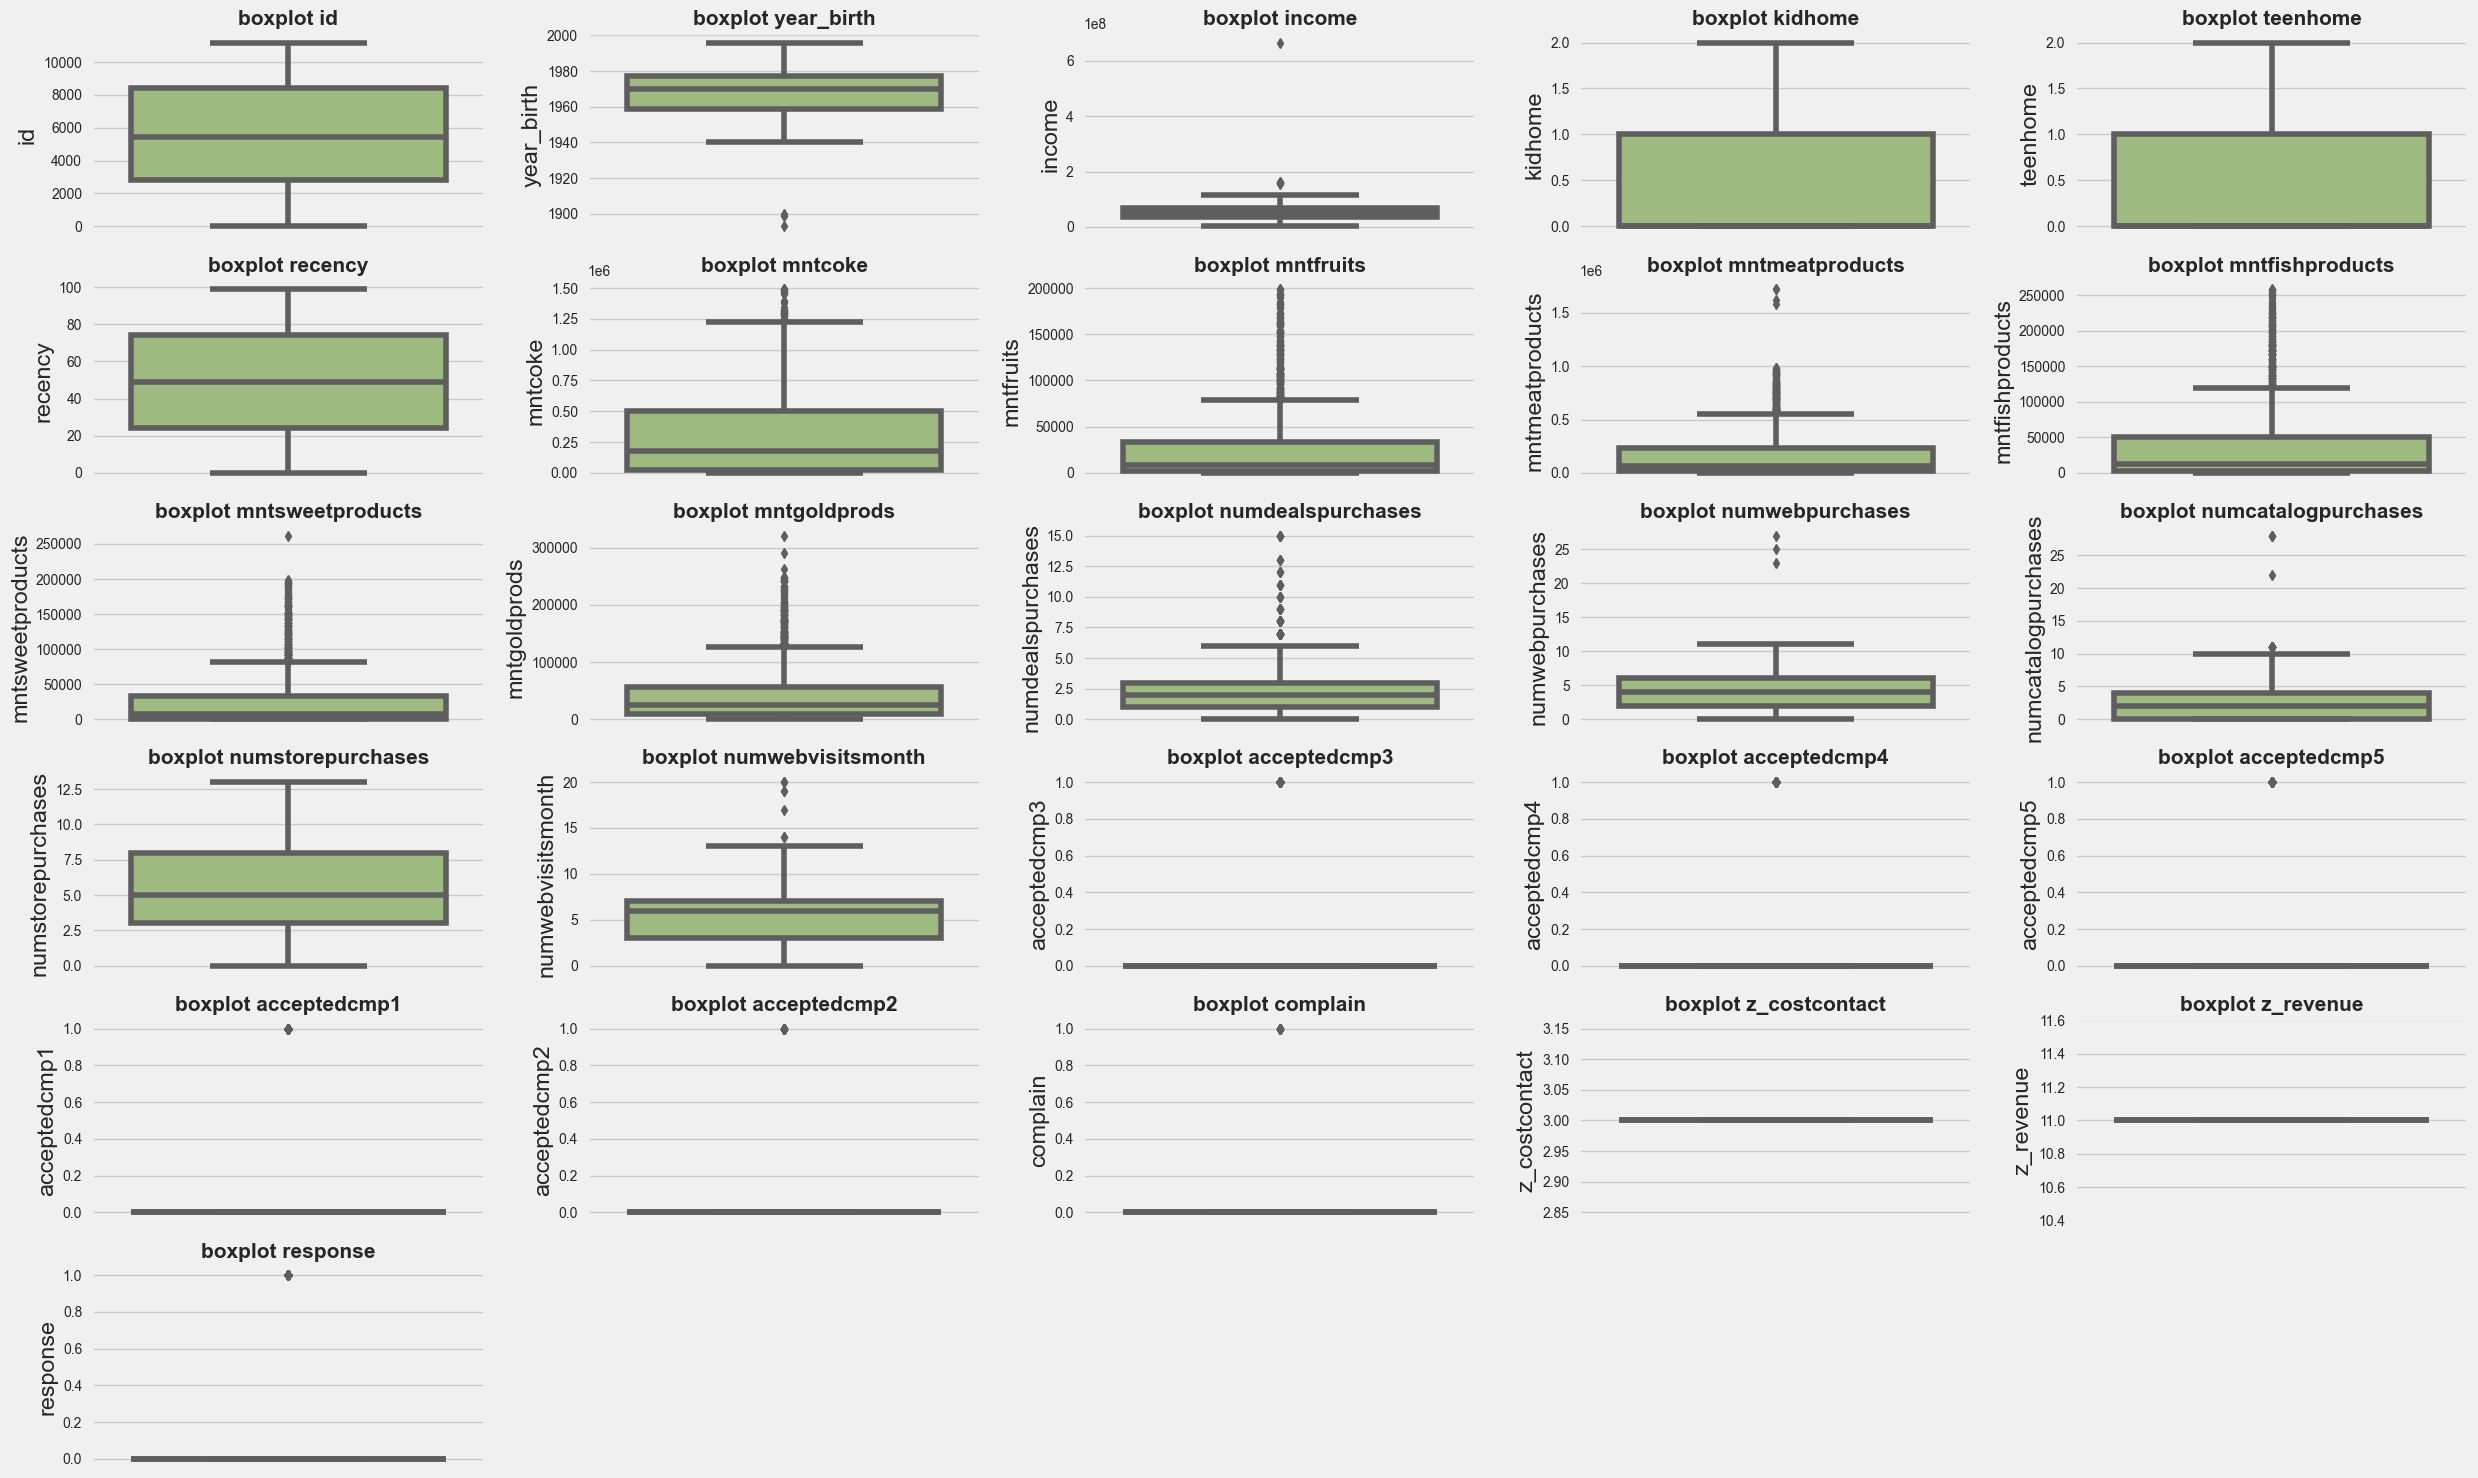

In [9]:
#check numerical distribution 
num = list(df1.select_dtypes(["int64","float64"]))

plt.figure(figsize=(25,15))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/5), 5 , i+1)
    sns.boxplot(y=df1[num[i]], color='g', orient= "v")
    plt.title("boxplot {}".format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

Because features have extreme outliers, only those feature columns will be handled.

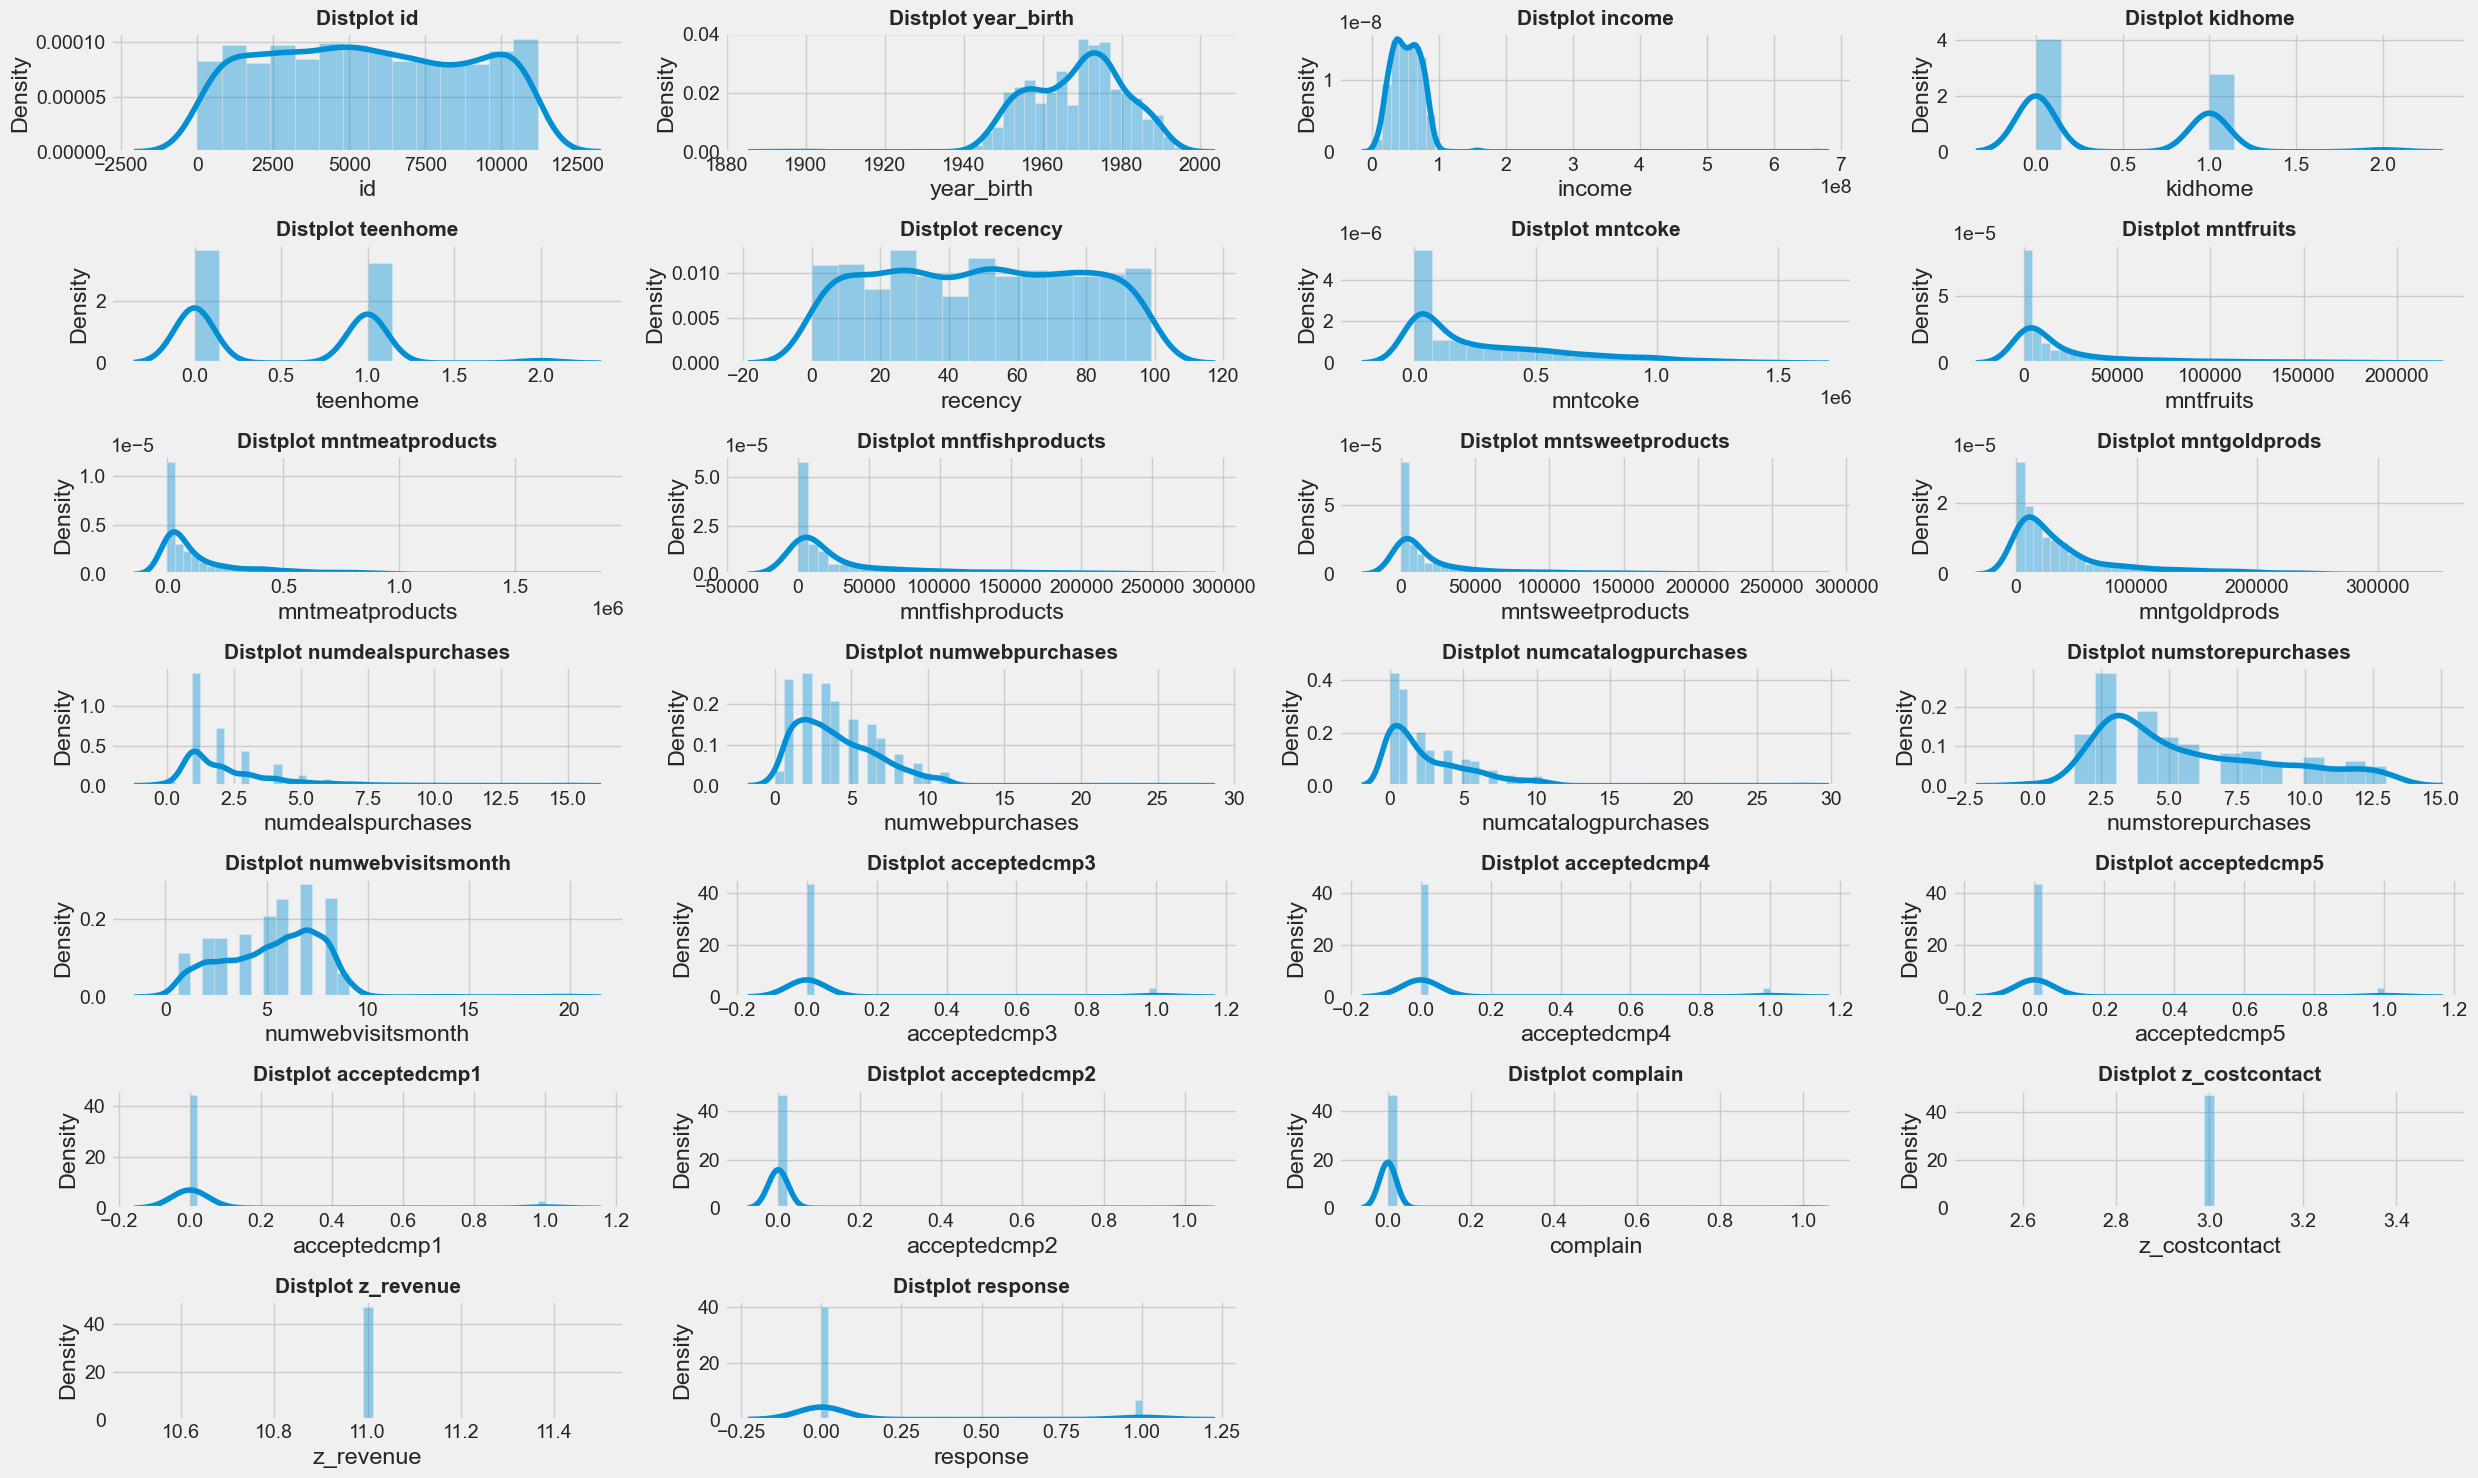

In [25]:
plt.figure(figsize=(25, 15))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/4),4, i+1)
    sns.distplot(df1[num[i]])
    plt.title('Distplot {}'.format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

In [26]:
for i in range(0, len(num)):
    print(f"Skewness {df1[num].columns[i]} : {df1[num[i]].skew()}")

Skewness id : 0.04045921584396176
Skewness year_birth : -0.3536614700288031
Skewness income : 6.763487372811117
Skewness kidhome : 0.6356100646634026
Skewness teenhome : 0.40755280239070707
Skewness recency : 0.0016477067463847978
Skewness mntcoke : 1.1707200955543913
Skewness mntfruits : 2.101657525150595
Skewness mntmeatproducts : 2.0255768067844637
Skewness mntfishproducts : 1.916368950232168
Skewness mntsweetproducts : 2.1033275863706797
Skewness mntgoldprods : 1.839230936129571
Skewness numdealspurchases : 2.415271762315824
Skewness numwebpurchases : 1.1970370130708343
Skewness numcatalogpurchases : 1.8810750511540515
Skewness numstorepurchases : 0.7018262973284631
Skewness numwebvisitsmonth : 0.2180430456390019
Skewness acceptedcmp3 : 3.2693969568782
Skewness acceptedcmp4 : 3.256758193853604
Skewness acceptedcmp5 : 3.2821432492590605
Skewness acceptedcmp1 : 3.5624821800168314
Skewness acceptedcmp2 : 8.424753003647503
Skewness complain : 10.132736682249801
Skewness z_costcontact :

it can be seen that the distribution has a tendency to skewness. However, the skew value of these features is not so big it's just that the `Complain` feature has a skew value that reaches 10.

In [5]:
df_clean = df1.copy()
print(f'Number of rows before filtering outliers: {len(df1)}')

filtered_entries = np.array([True] * len(df_clean))
outlier = ["year_birth","income", 'mntmeatproducts', 'mntsweetproducts', 'numwebpurchases', 'numcatalogpurchases']
for i in outlier:
    Q1 = df_clean[i].quantile(0.25)
    Q3 = df_clean[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[i] >= low_limit) & (df_clean[i] <= high_limit)) & filtered_entries
    
df_clean = df_clean[filtered_entries]

print(f'Number of rows after filtering outliers: {len(df_clean)}')

Number of rows before filtering outliers: 2216
Number of rows after filtering outliers: 1840


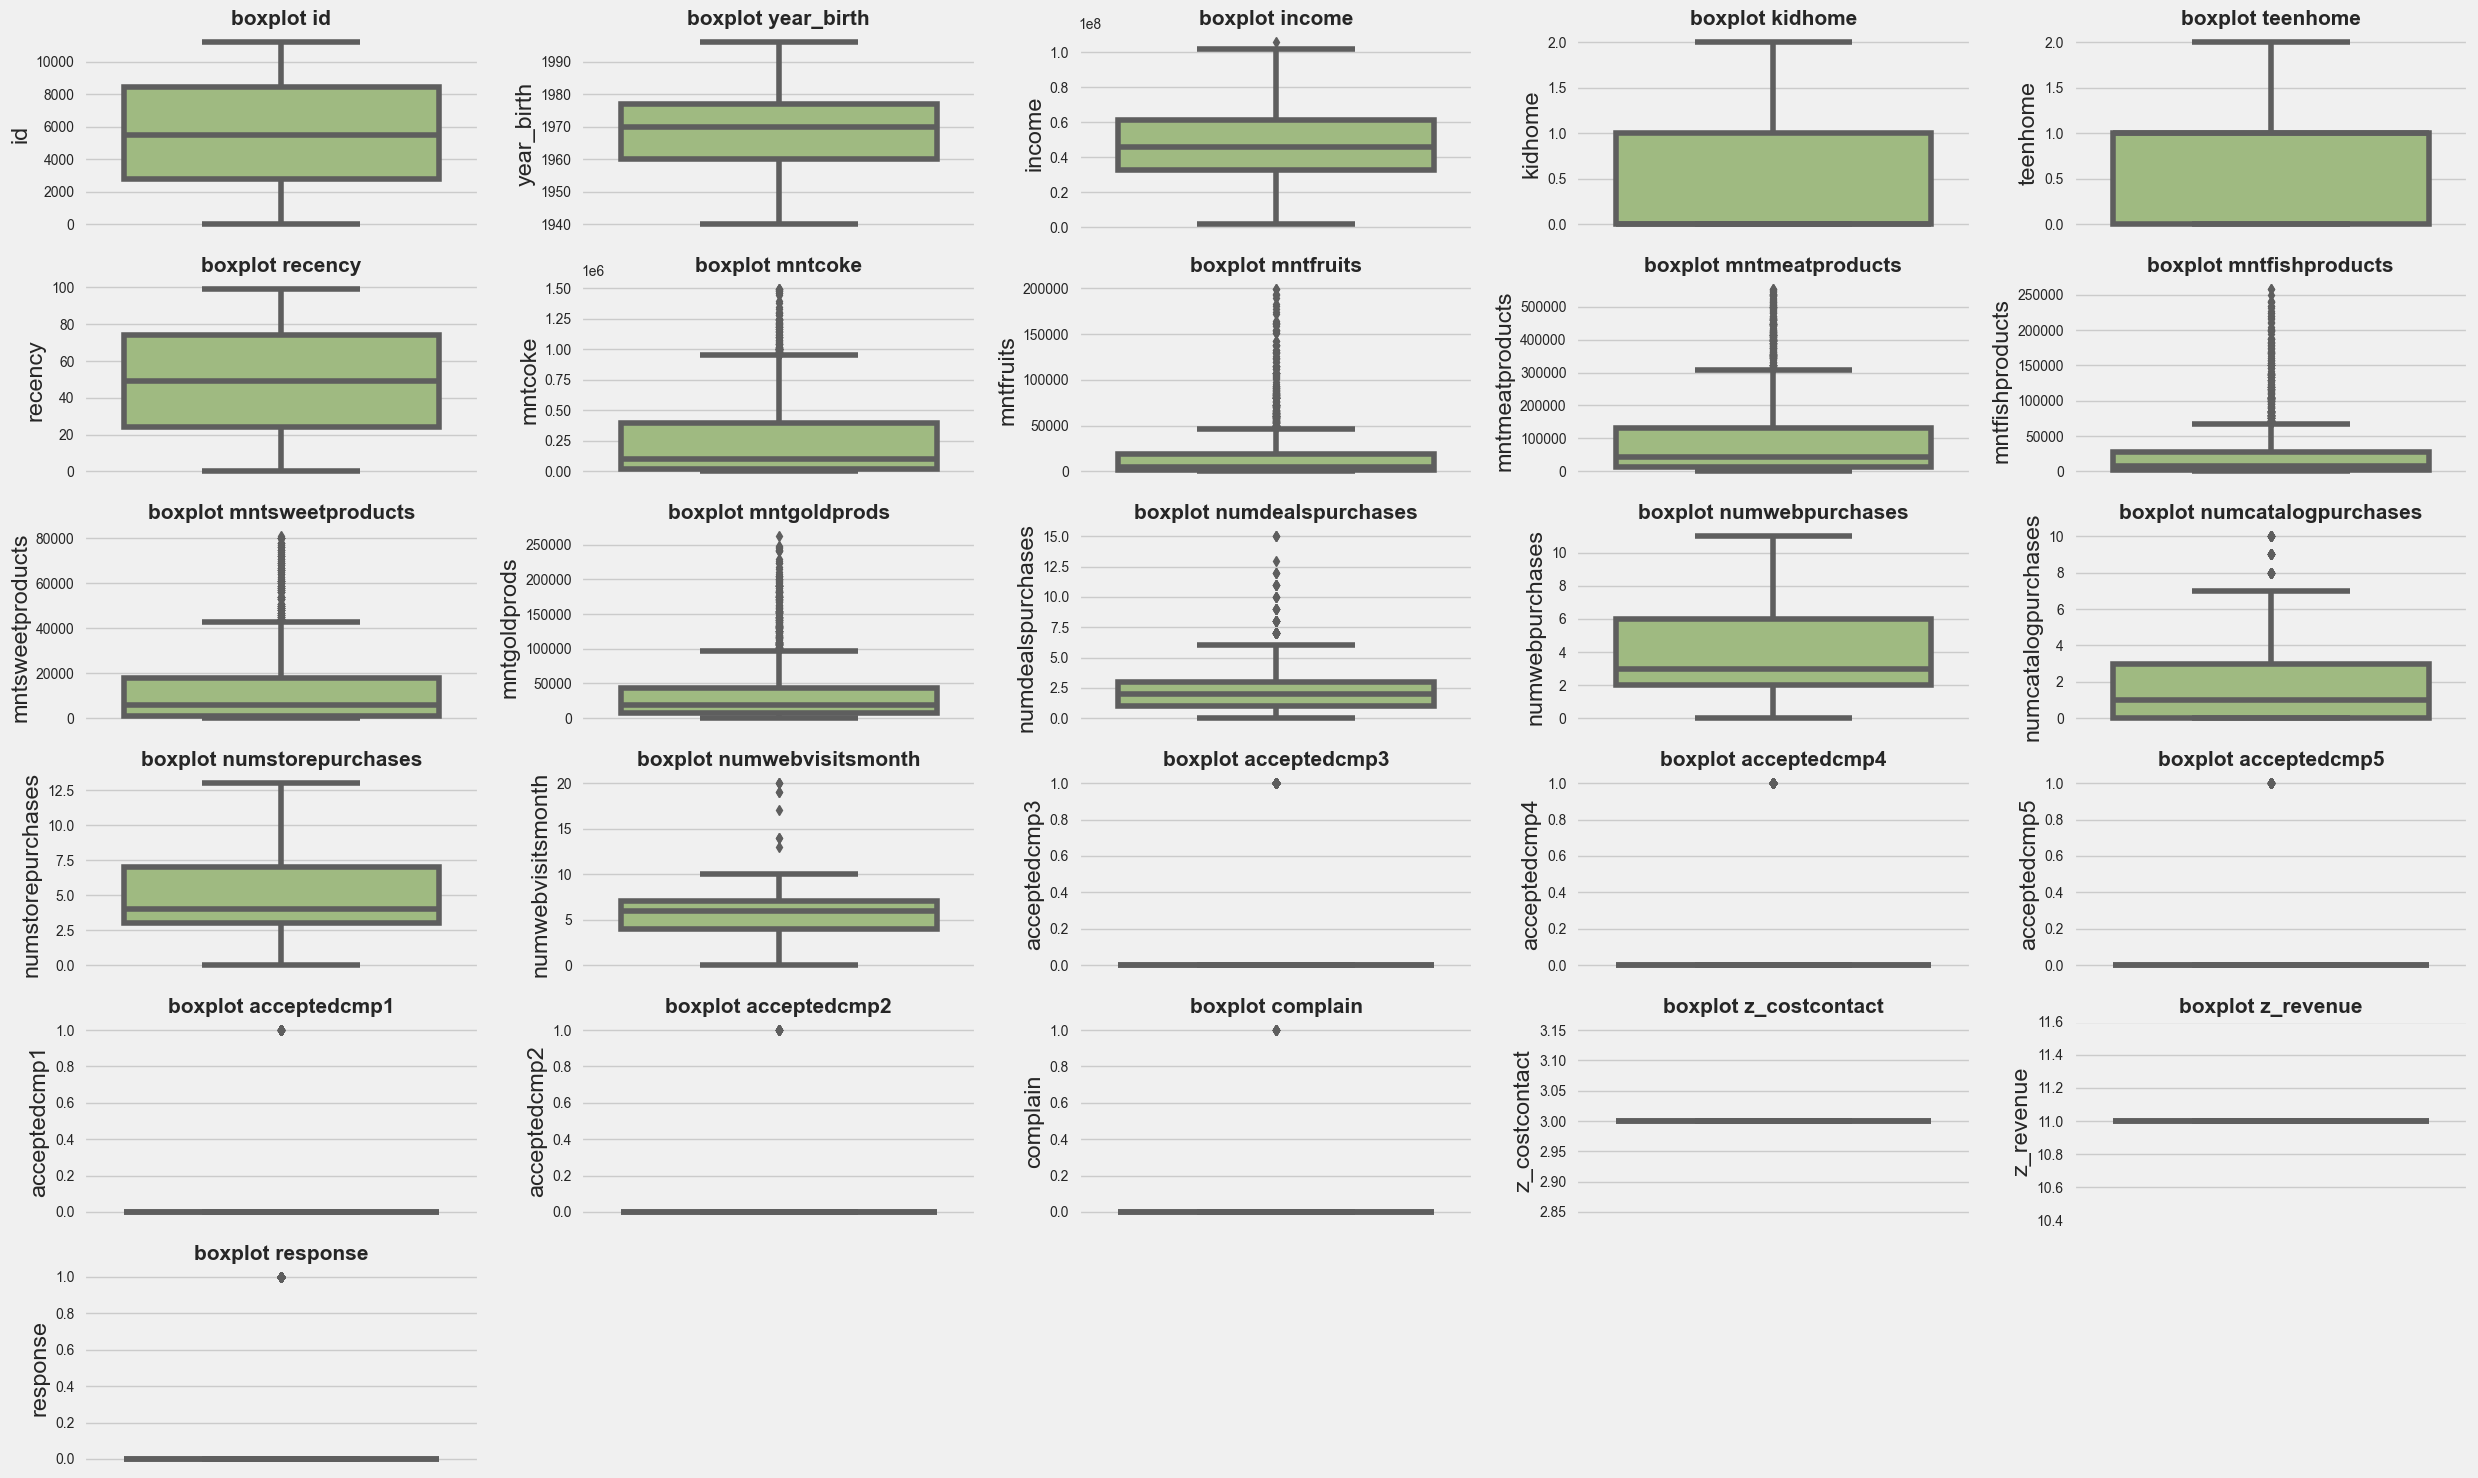

In [11]:
# check outlier after clean
plt.figure(figsize=(25,15))
for i in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/5), 5 , i+1)
    sns.boxplot(y=df_clean[num[i]], color='g', orient= "v")
    plt.title("boxplot {}".format(num[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

# Feature Engineering

make features from this dataset.

`conversion_rate`: make it from (Total Transaction / visit) customer history.

`age` :  Year_Birth - now.

number of children `total_kid`: from Kidhome + Teenhome.

Total money spent `total_spent`: from MntCoke + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

Total transaction `total_transaction` : from NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases

Total of days joined `membership_duration` (year) : now - Dt_Customer

total accepted campaign customer `total_accepted_cmp` = acceptedcmp1 + acceptedcmp2 + acceptedcmp3 +acceptedcmp4 + acceptedcmp5 


In [6]:
df2 = df_clean.copy()
print("Total Data {}".format(df2.shape))

#create age feature
df2["age"] = datetime.datetime.now().year - df_clean.year_birth

#create total kid
df2['total_kid'] = df_clean.kidhome + df1.teenhome 

# create total spent
df2["total_spent"] = df_clean.mntcoke + df_clean.mntfruits + df_clean.mntmeatproducts + df_clean.mntfishproducts + df_clean.mntsweetproducts + df_clean.mntgoldprods

# create total transaction 
df2["total_transaction"] = df_clean.numdealspurchases + df_clean.numwebpurchases + df_clean.numcatalogpurchases + df_clean.numstorepurchases

# create membership duration 
df2["membership_duration"] = datetime.datetime.now().year - df_clean.dt_customer.dt.year

#  create total accepted campaign 
df2["total_accepted_cmp"] = df_clean.acceptedcmp1 + df_clean.acceptedcmp2 + df_clean.acceptedcmp3 + df_clean.acceptedcmp4 + df_clean.acceptedcmp5 

Total Data (1840, 29)


In [7]:
# make conversion rate
def cvr(response,visit) :
    if visit == 0 :
        return 0
    return response/visit

df2["conversion_rate"] = df2.apply(lambda x: cvr(x["total_transaction"], x["numwebvisitsmonth"]), axis= 1)


In [8]:
new_feature = ["age","total_kid","recency" ,"total_spent", "total_transaction", "membership_duration", "total_accepted_cmp", "conversion_rate"]

display(round(df2[new_feature].describe(percentiles= [0.25,0.50,0.7,0.75,0.95])).T, df2.describe(include= "object"))
print(f"uniq value",df2.age.unique())

,count,mean,std,min,25%,50%,70%,75%,95%,max
age,1840.0,54.0,11.0,27.0,46.0,53.0,61.0,63.0,73.0,83.0
total_kid,1840.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0
recency,1840.0,49.0,29.0,0.0,24.0,49.0,69.0,74.0,94.0,99.0
total_spent,1840.0,441633.0,478203.0,5000.0,57000.0,231500.0,601300.0,735250.0,1440250.0,2231000.0
total_transaction,1840.0,14.0,7.0,0.0,7.0,12.0,18.0,20.0,26.0,35.0
membership_duration,1840.0,10.0,1.0,9.0,9.0,10.0,10.0,10.0,11.0,11.0
total_accepted_cmp,1840.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
conversion_rate,1840.0,3.0,4.0,0.0,1.0,2.0,4.0,4.0,10.0,27.0


,education,marital_status
count,1840,1840
unique,5,3
top,S1,Menikah
freq,904,718


uniq value [69 58 39 42 56 52 38 49 73 47 71 36 77 43 74 41 72 54 34 60 53 50 80 66
 48 27 55 46 45 35 44 64 63 51 40 78 59 32 61 70 67 65 57 62 75 37 33 76
 31 68 29 79 28 30 83]


- in the age feature the average customer age is 54 years, and because it has many unique values ​​it will be categorized later.
- On average, customers only have 1 child and at most only 3 children.
- customer purchases have a gap of 1.5 months since they made their last purchase
- It can be seen that the average transaction is only 14 times, up to a maximum of 35 times
- The average customer has been with us for 10 years
- In general, customers don't receive the campaigns that have been launched.
- average conversion rate is only 3%

Because the `age` feature has many unique values, it will be categorized <br>
take from the quantile statistical summary then : 

27 - 40 =  young age adult <br>
41 - 55 = middle age adult<br>
56 - 64 = old age  
65 > = senior old age 

In [9]:
df2["age_category"] = df2["age"].apply(lambda x: 'young age adult' if x <= 40 else ('middle age adult' if x <= 55 else 
                                                                             ('old age' if x <=64 else'senior old age' )))
df2.age_category.value_counts()

age_category
middle age adult    830
senior old age      408
old age             363
young age adult     239
Name: count, dtype: int64

## EDA(Exploratory Data Analysis) 

### univariate analysis

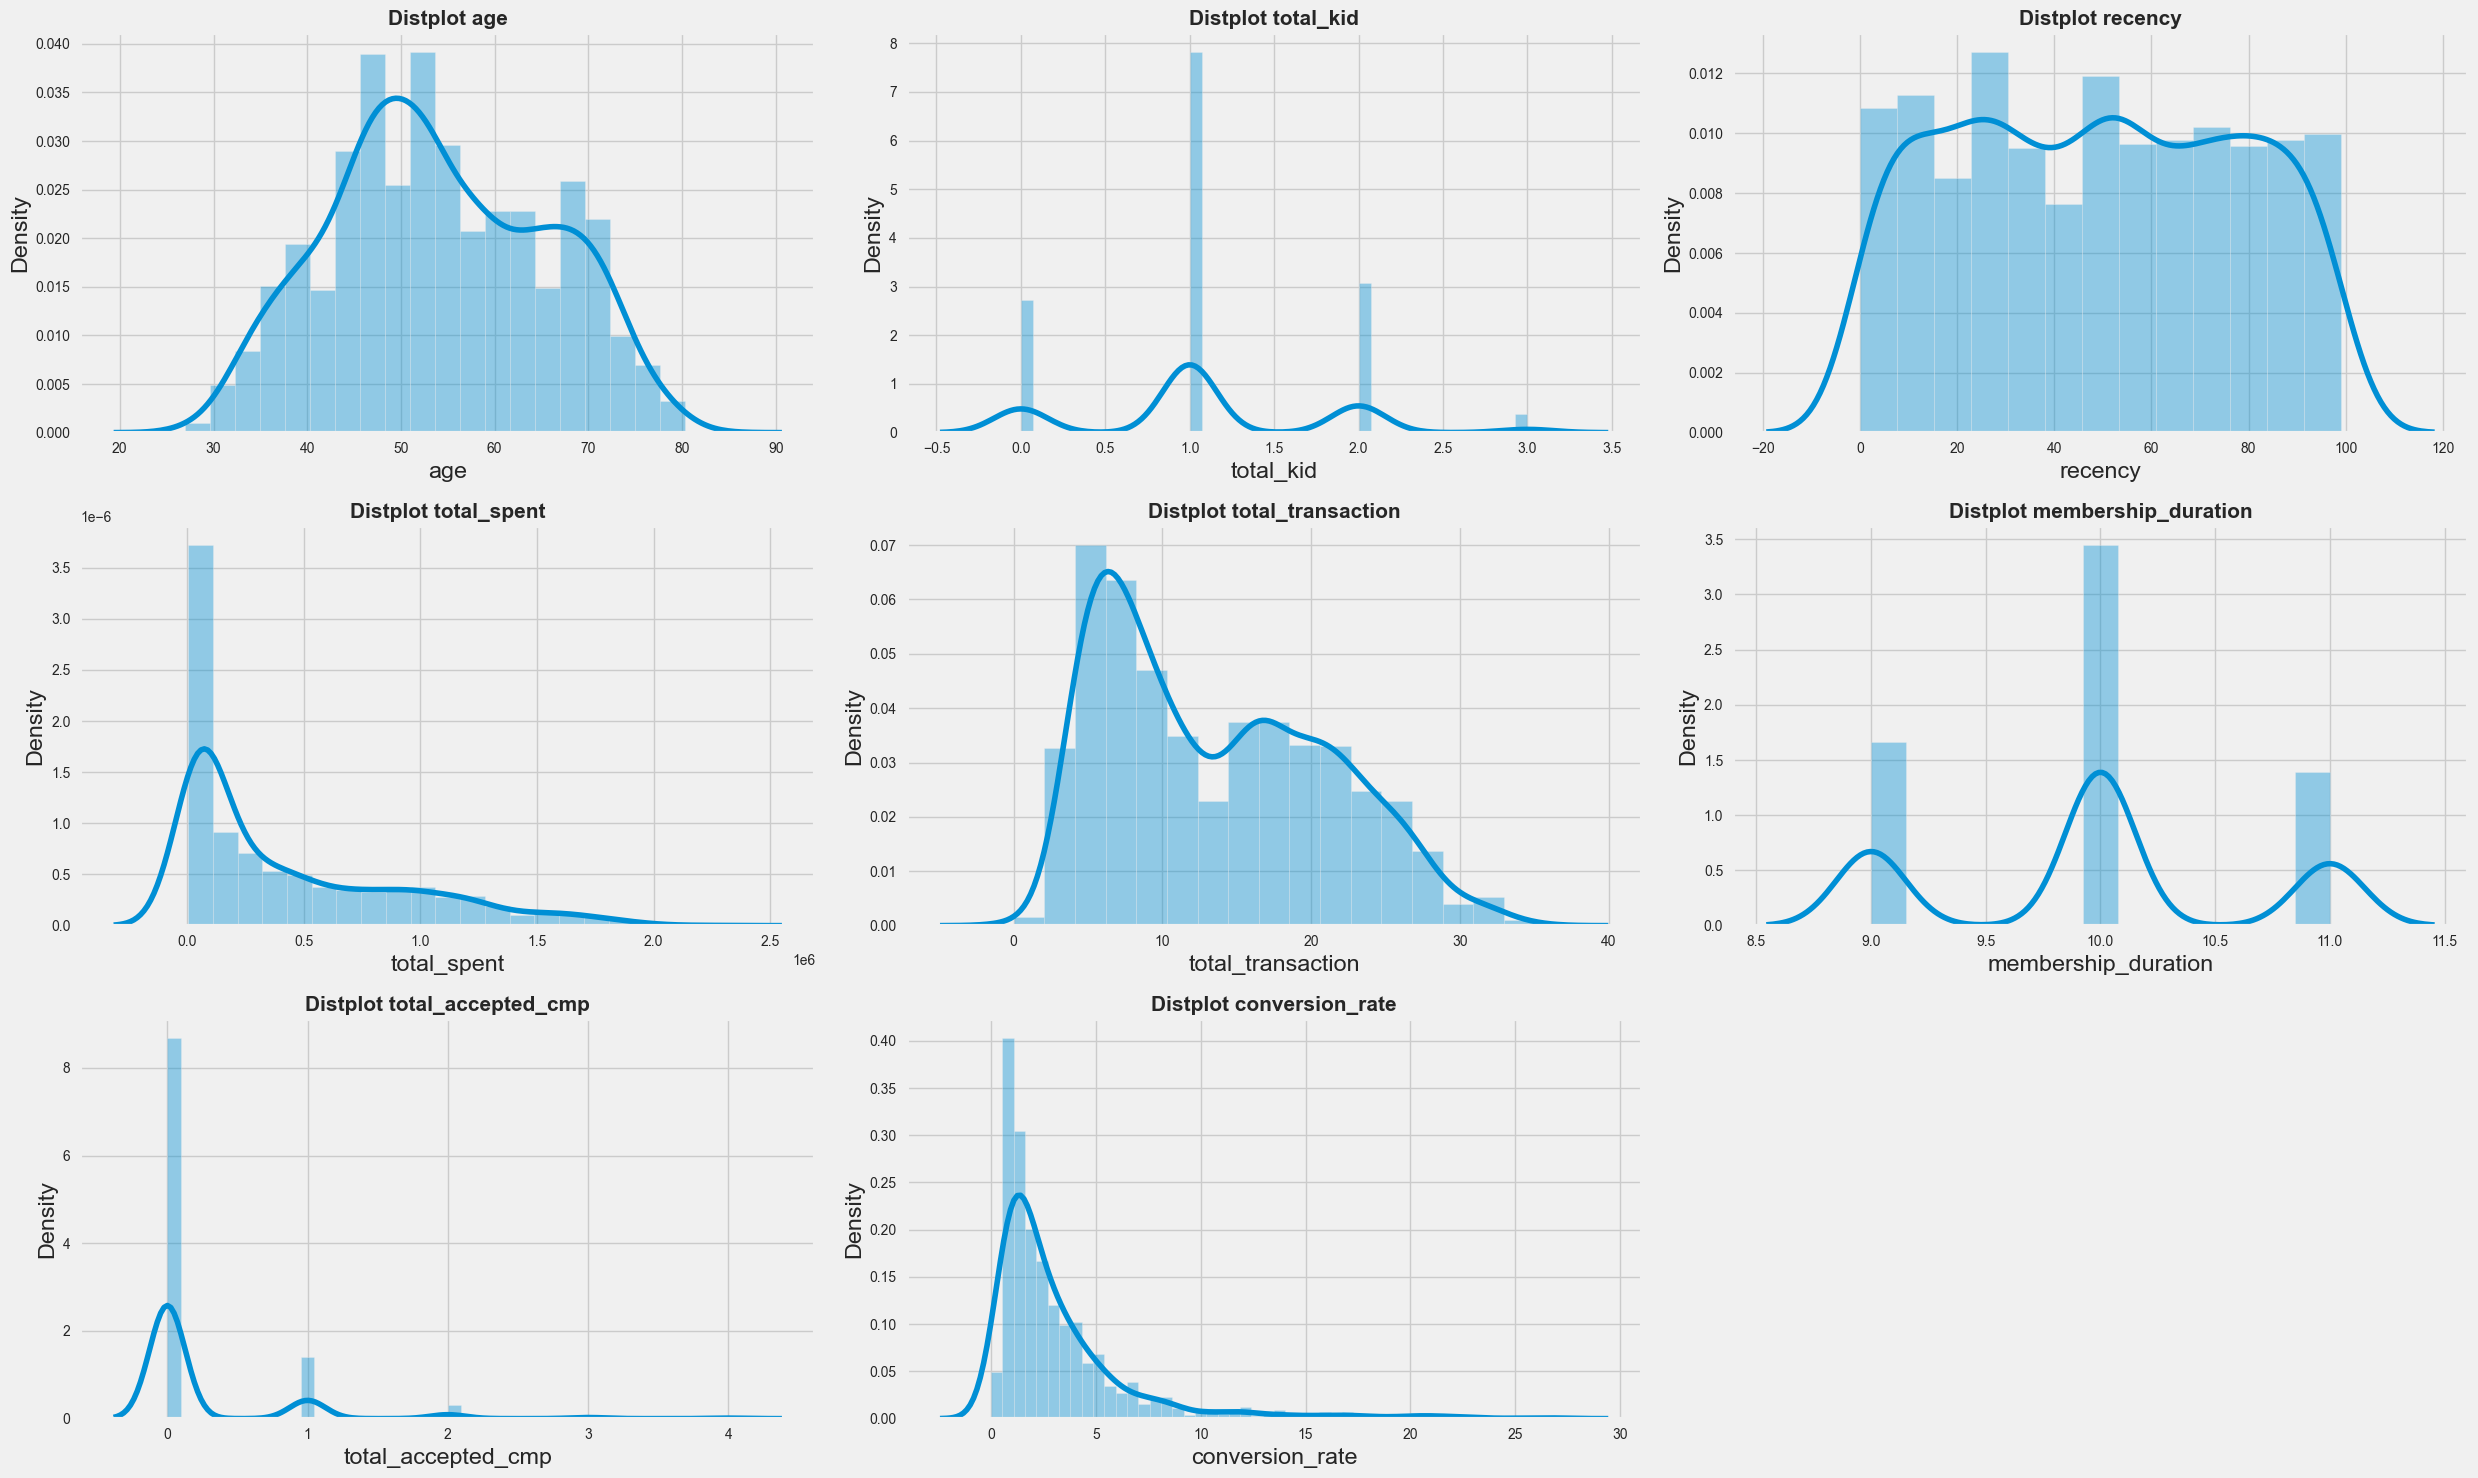

In [11]:
# check skewness for new feature 
plt.figure(figsize=(25, 15))
for i in range(0, len(new_feature)):
    plt.subplot(math.ceil(len(new_feature)/3),3, i+1)
    sns.distplot(df2[new_feature[i]])
    plt.title('Distplot {}'.format(new_feature[i]), fontsize=15, fontweight='bold')
    plt.tight_layout()

In [12]:
for i in range(0, len(new_feature)):
    print(f"Skewness {df2[new_feature].columns[i]} : {df2[new_feature[i]].skew()}")

Skewness age : 0.11479639412431397
Skewness total_kid : 0.3149330670344479
Skewness recency : 0.021945367089884666
Skewness total_spent : 1.14835191884842
Skewness total_transaction : 0.46634603647973977
Skewness membership_duration : 0.05315781969947776
Skewness total_accepted_cmp : 3.1067138762663693
Skewness conversion_rate : 2.90108373438801


- It can be seen that the age feature, total spent is almost close to normal
- for the rest it tends to be a skewwnes distribution

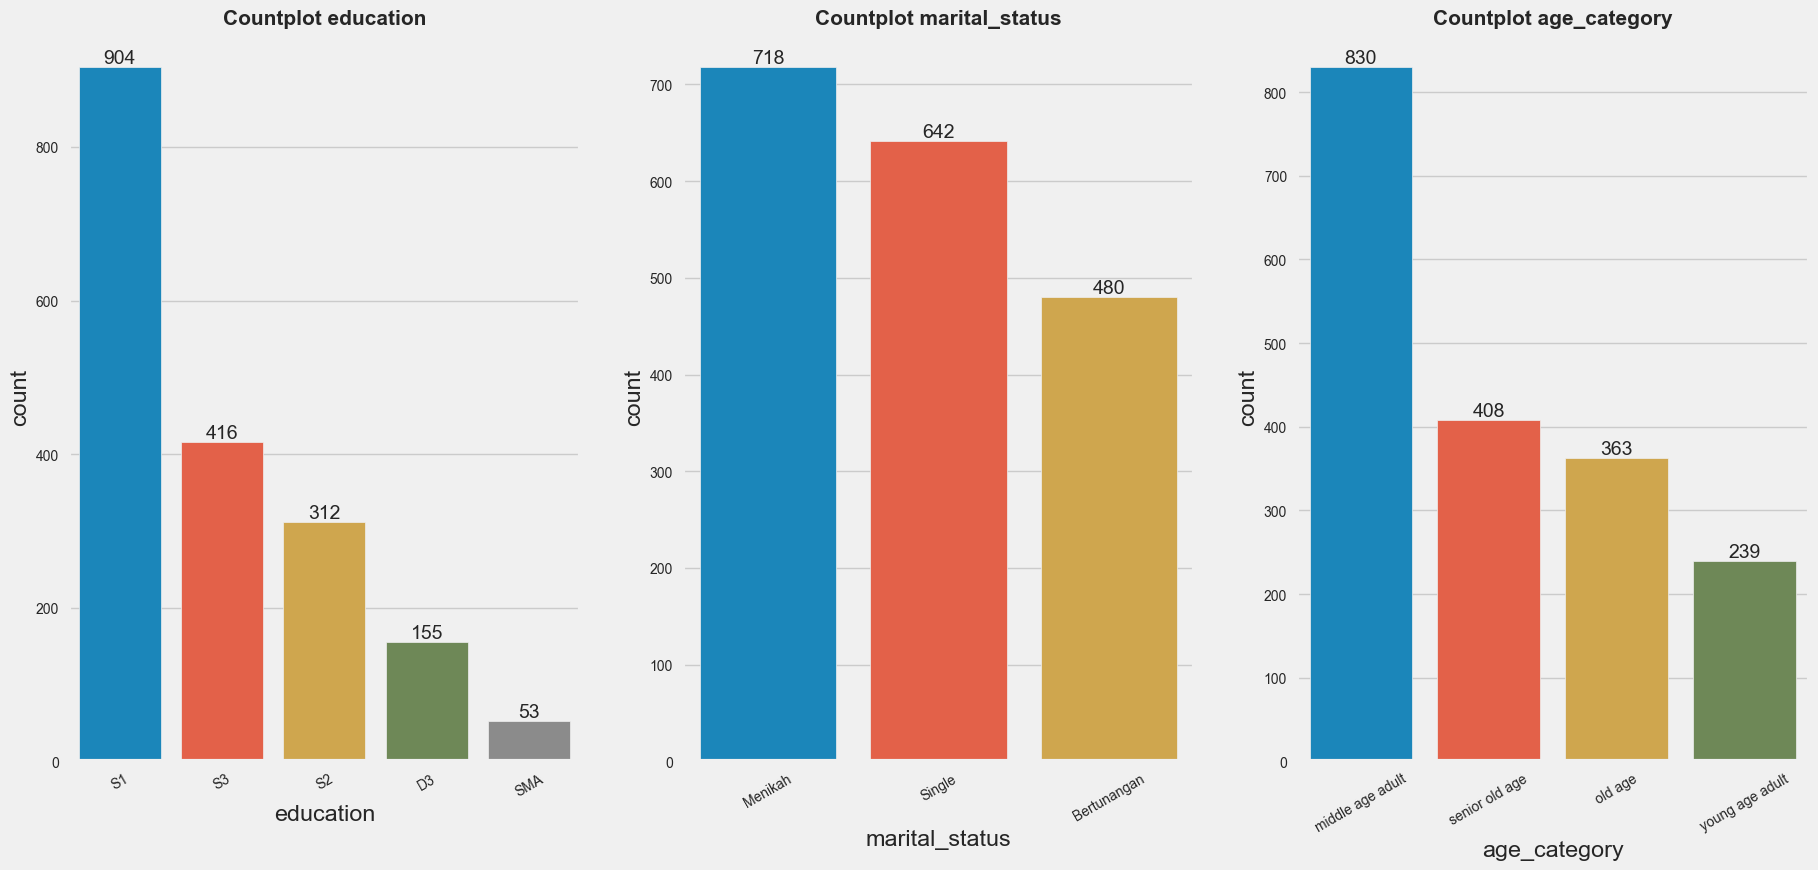

In [13]:
new = list(df2.select_dtypes("object"))

plt.figure(figsize=(20, 9))
for i in range (0, len(new)):
  plt.subplot(math.ceil(len(new)/3),3, i+1)
  ax = sns.countplot(x=df2[new[i]], order = df2[new[i]].value_counts().index)
  plt.title('Countplot {}'.format(new[i]), fontsize = 15 , fontweight = "bold")
  plt.xticks(rotation = 30)
  for i in ax.containers :
    ax.bar_label(i)

For categorical data, it can be seen that it is quite clean, so we will continue with multivariate analysis

## Multivariate Analysis

<Axes: >

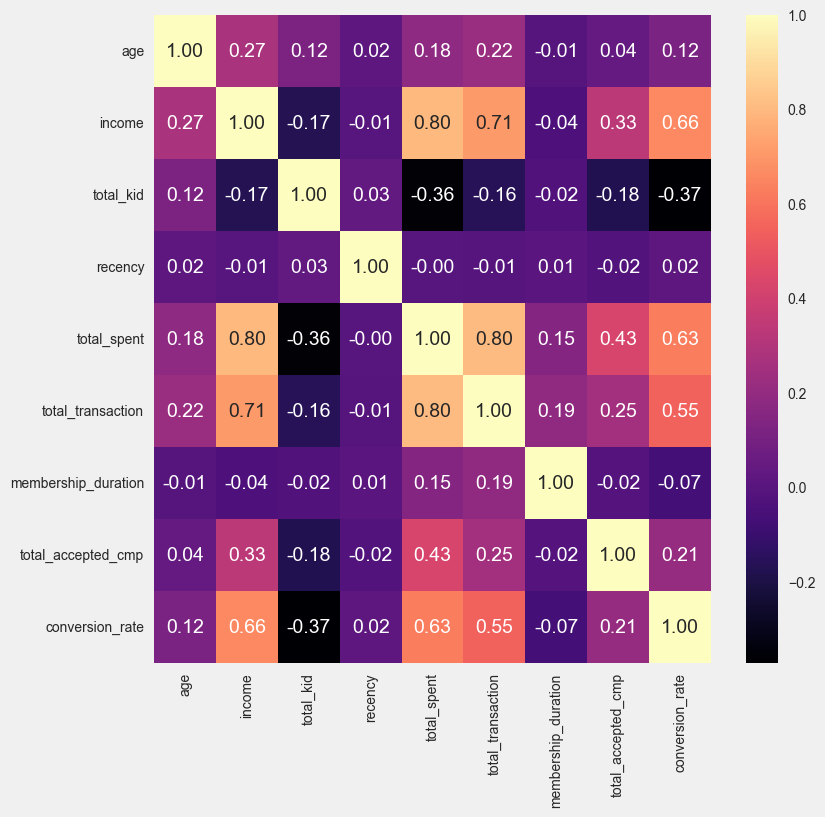

In [14]:
check_corr = ["age","income","total_kid","recency" ,"total_spent", "total_transaction", "membership_duration", "total_accepted_cmp", "conversion_rate"]
plt.figure(figsize=(8, 8))
sns.heatmap(df2[check_corr].corr(), cmap='magma', annot=True, fmt='.2f')

Result : 
`Age`, `income`, `total spent`, `total transactions`, and `total accepted campaigns` are among the features that are shown, has significant correlation each other and with the conversion rate, so in order to fully understand the distribution of the data we have, we are going to analyze the scatterplot of the features that do.

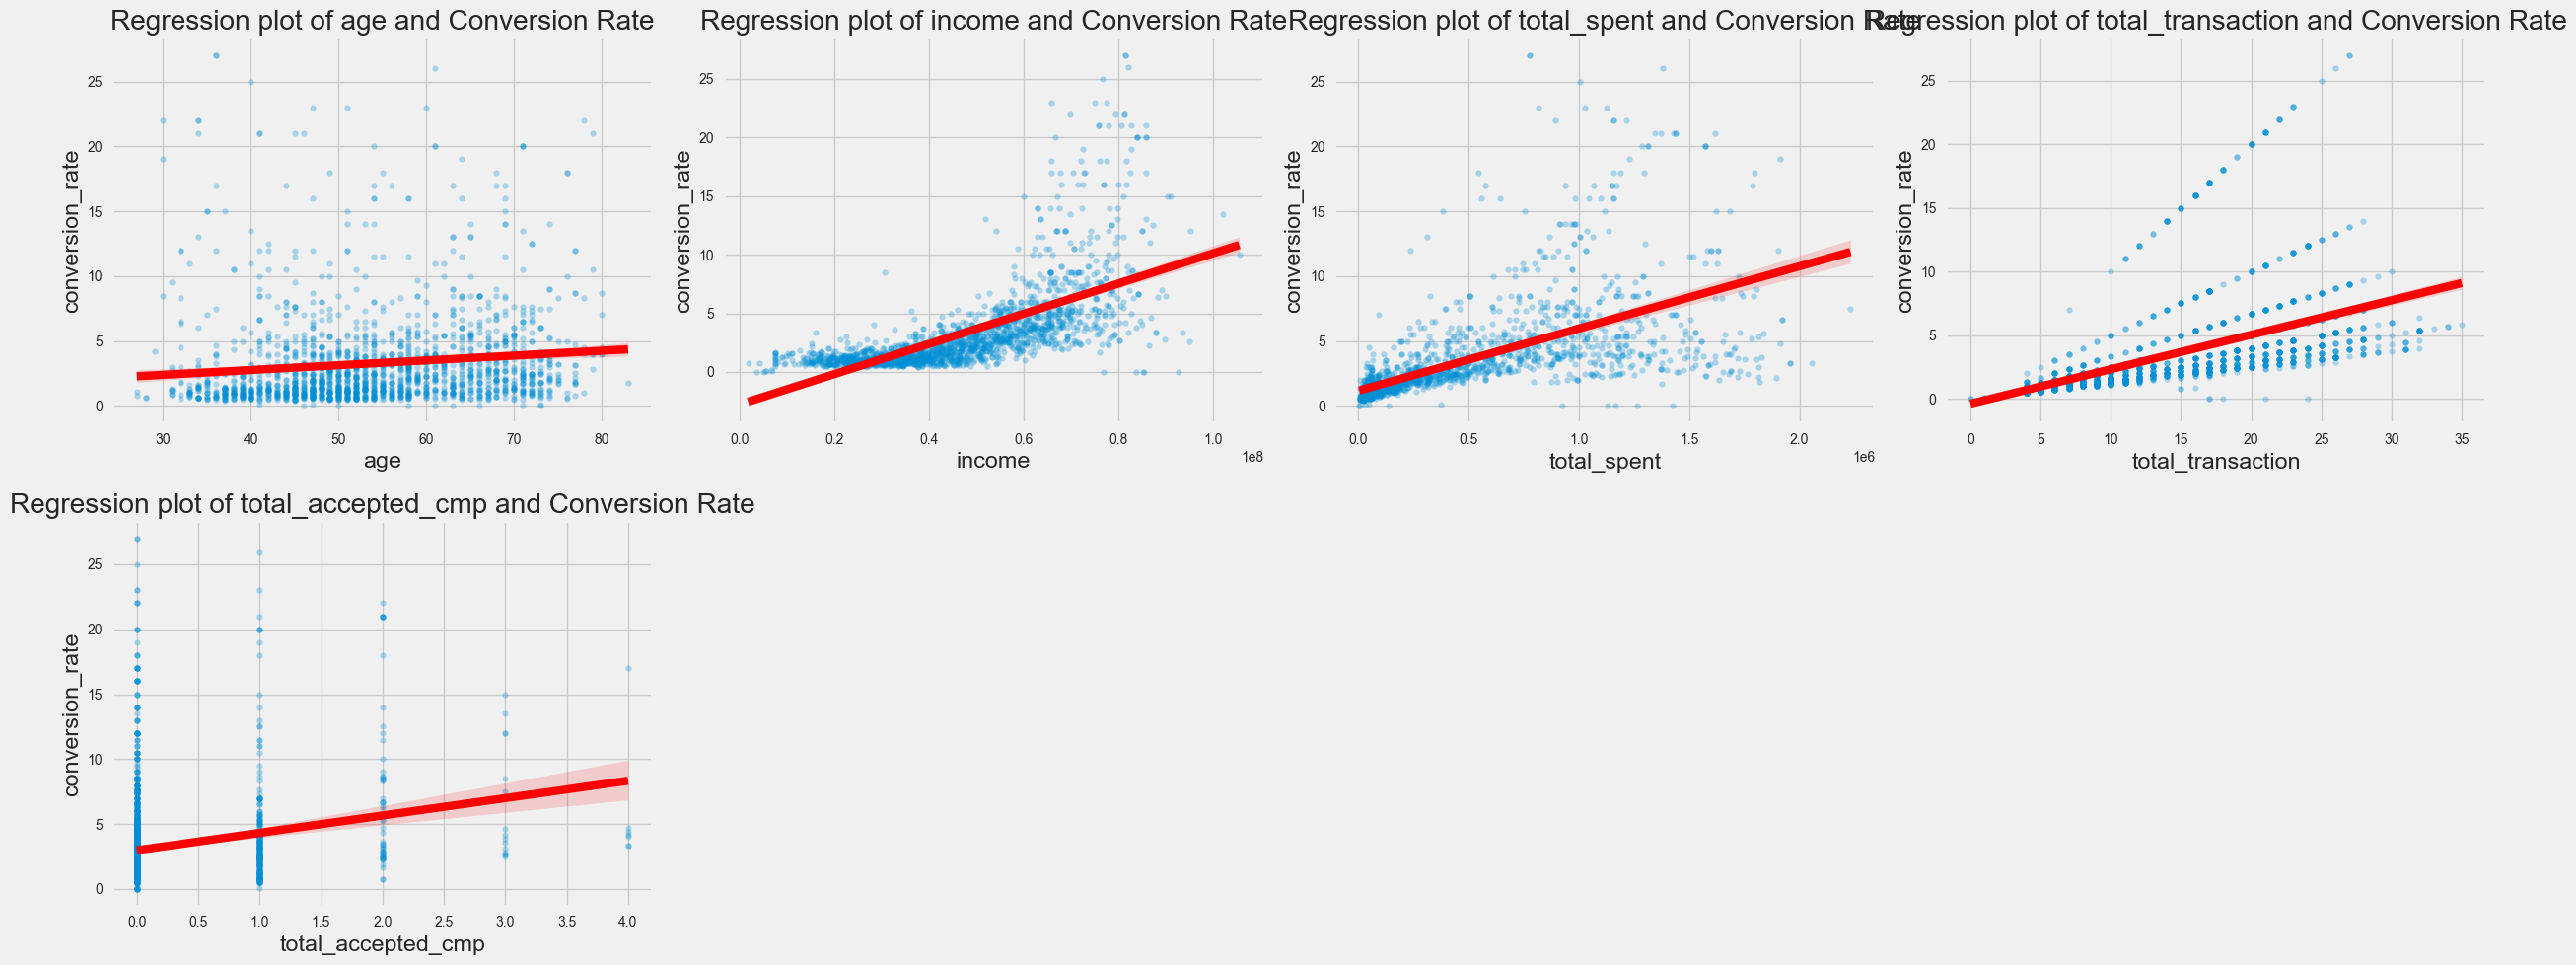

In [15]:
variable = ["age","income", "total_spent", "total_transaction", "total_accepted_cmp"]

plt.figure(figsize=(25, 10))
for i in range(0, len(variable)):
    plt.subplot(math.ceil(len(variable)/4),4, i+1)
    sns.regplot(x=df2[variable[i]], y='conversion_rate', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'red'}).set(title=f'Regression plot of {variable[i]} and Conversion Rate')
    plt.tight_layout()

### Result :
- The age feature has been proven on the heatmap and scatter plot that the correlation with the conversion rate is very weak, so it can be concluded that the age factor has a weak influence on the conversion rate.
- Income shows a strong correlation. It can be seen that the higher the customer's income, the greater the chance that the customer will convert and buy the product.
- for total spent and total transactions, you can be sure that there is a strong correlation with the conversion rate, because people who have converted will definitely buy the product,
- for campaigns, it shows that if customers accept the campaign, then the customer will have a high chance of converting, so the company can be recommended to create the right campaign strategy to increase the customer's chances of converting and buying the product that has been offered.

## Data Preprocessing


In [10]:
from sklearn.preprocessing import LabelEncoder

df3 = df2.copy()
education = {'SMA' : 0, 
            'D3' : 1, 
            'S1' : 2, 
            'S2' : 3, 
            'S3' : 4}

age_cat = {"young age adult" : 0,
           "middle age adult" : 1,
           "old age" : 2,
           "senior old age" : 3}

df3['education'] = df3['education'].map(education)
df3['age_category'] = df3['age_category'].map(age_cat)

label = LabelEncoder()
df3["marital_status"] = label.fit_transform(df3["marital_status"])

df3.sample(4)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,...,z_revenue,response,age,total_kid,total_spent,total_transaction,membership_duration,total_accepted_cmp,conversion_rate,age_category
282,8652,1946,2,0,37760000,0,0,2012-08-31,20,84000,...,11,0,77,0.0,317000,13,11,0,1.857143,3
14,2569,1987,2,1,17323000,0,0,2012-10-10,38,3000,...,11,0,36,0.0,46000,5,11,0,0.625000,0
499,466,1944,2,1,65275000,0,0,2013-04-03,9,388000,...,11,0,79,0.0,746000,21,10,0,10.500000,3
2019,2375,1972,2,0,30261000,1,2,2012-09-25,75,8000,...,11,0,51,3.0,22000,4,11,0,0.500000,1


## Feature selection 

remove unnecessary data

In [11]:
from sklearn.preprocessing import StandardScaler
# experiment
X = df3.drop(columns=['id', 'year_birth', 'education', 'marital_status', 'age_category', 'dt_customer', 'complain', 'z_costcontact', 'z_revenue', 'response'])

scaler = StandardScaler()
df_final = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
df_final.sample(5)

,income,kidhome,teenhome,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,age,total_kid,total_spent,total_transaction,membership_duration,total_accepted_cmp,conversion_rate
856,0.762797,-0.950225,0.809803,0.742011,0.478608,0.229771,-0.549519,-0.458290,0.586263,3.962842,...,-0.200339,-0.194394,-0.11496,0.872917,-0.108989,0.548801,0.596469,-1.400057,1.340640,0.741436
769,-0.753142,0.876749,-1.022962,1.018801,-0.712623,-0.584832,-0.661692,-0.552627,-0.679909,-0.753409,...,-0.200339,-0.194394,-0.11496,-0.172935,-0.108989,-0.827558,-0.751815,-1.400057,-0.401435,-0.625026
1424,-0.451916,0.876749,-1.022962,-0.987926,-0.251297,-0.483007,0.139541,-0.222448,-0.734960,-0.404057,...,-0.200339,-0.194394,-0.11496,-1.131633,-0.108989,-0.246057,0.461641,-1.400057,-0.401435,-0.317572
668,0.311038,-0.950225,0.809803,0.811209,0.447010,-0.584832,1.133069,1.522785,3.063556,0.709502,...,-0.200339,-0.194394,-0.11496,1.221535,-0.108989,0.875111,1.809925,0.061148,-0.401435,0.946406
642,-0.883097,0.876749,-1.022962,-1.403111,-0.791617,-0.483007,-0.717778,-0.552627,-0.459705,-0.687905,...,-0.200339,-0.194394,-0.11496,-0.260089,-0.108989,-0.873576,-1.291129,-1.400057,-0.401435,-0.742152


## Modeling

## PCA
To reduce the dimensions of the data, we will do PCA first

In [12]:
from sklearn.decomposition import PCA 

# fit pca
pca = PCA(n_components = 2)
pca.fit(df_final)
df_pca = pca.transform(df_final)
df_pca = pd.DataFrame(df_pca)
df_pca

,0,1
0,-2.651232,0.355081
1,3.130111,-1.268188
2,-2.689620,-1.385226
3,0.648505,-0.373929
4,2.181611,0.772462
...,...,...
1835,-3.084912,-1.286503
1836,0.205456,4.051060
1837,3.253779,-1.038918
1838,3.598056,0.039694


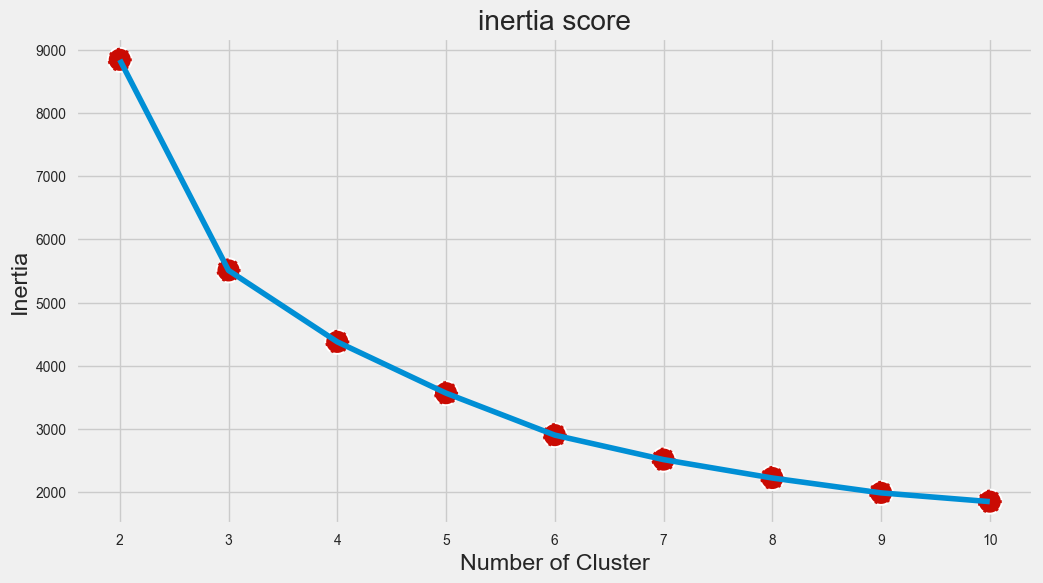

In [13]:
inertia = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# graph elbow 
plt.figure(figsize=(11, 6))
sns.lineplot(x=range(2, 11), y=inertia, linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='r',  linestyle='--')
plt.ylabel('Inertia')
plt.xlabel('Number of Cluster')
plt.title("inertia score")
plt.show()

In [14]:
inertia_table = pd.DataFrame((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100, columns=['Inertia Reduction (%)'])
inertia_table

,Inertia Reduction (%)
0,37.672402
1,20.507098
2,18.522572
3,18.586574
4,13.335595
5,11.550716
6,10.562020
7,6.949697
8,NaN


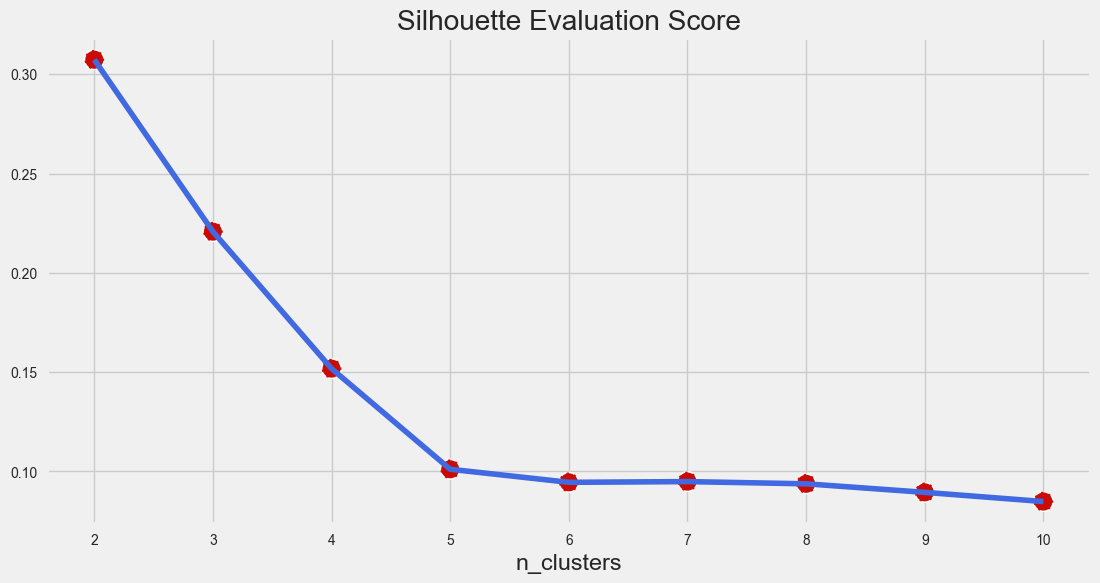

In [15]:
arr_silhouette_score_euclidean = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(df_pca)
    preds = kmeans.predict(df_pca)
     
    score_euclidean = silhouette_score(df_final, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
    
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='royalblue', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=200, color='r',  linestyle='--')
plt.title('Silhouette Evaluation Score')
plt.xlabel('n_clusters')
plt.show()

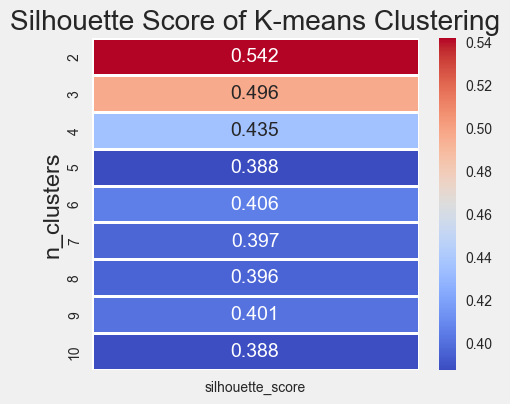

In [16]:
def visualize_silhouette_layer(data):
    results = []

    for i in range(2,11):
        km = KMeans(n_clusters=i, init='k-means++',random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

visualize_silhouette_layer(df_pca)


### Result : 

base on elbow method and silhoute score best cluster is 3.

## Clustering K means

In [17]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(df_pca.values)
df_pca['cluster'] = kmeans.labels_
X["cluster"] = kmeans.labels_

df_pca.rename(columns= {0 : "pc0",
                        1 : "pc1"}, inplace= True)

df_pca.sample(5)

,pc0,pc1,cluster
609,4.676603,-0.145839,0
1435,0.908370,0.879871,2
1091,0.174066,0.951629,2
357,-3.218551,-1.433765,1
1591,1.479047,0.833728,2


Text(0.5, 1.0, 'Cluster Segementation')

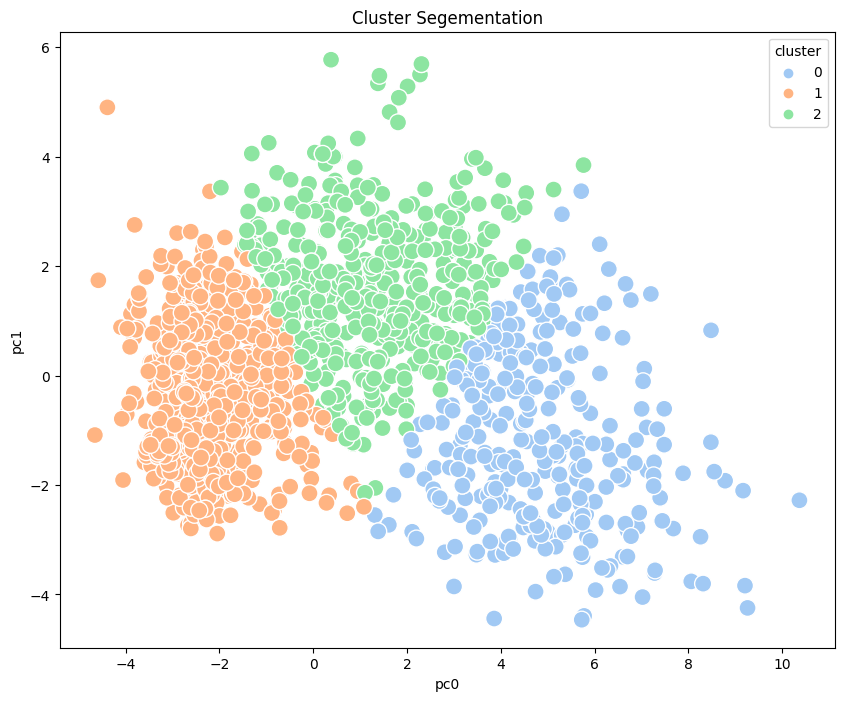

In [18]:
plt.style.use("default")
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x="pc0", y="pc1", hue='cluster', palette=sns.color_palette("pastel"), s = 150)
plt.title('Cluster Segementation')

## Result 

From the results of the scatterplot above, it can be said that the number of clusters equal to 3 is the right number of clusters. where it can be seen that there is a fairly clear segmentation between the clusters.

# **Customer Personality Analysis for Marketing Retargeting**
### Interpretation cluster  RFM segmented : 
Features  which have the possibility to help understand customer personality. <br>
feature will be take it :

In [19]:

feature_rfm = ['recency' , 'total_transaction','total_spent'
             , 'age' ,'income','conversion_rate' ,'cluster','numwebvisitsmonth']
stats = X[feature_rfm]
stats

pd.set_option('display.max_columns',None)
display(round(stats.groupby("cluster").agg(['mean','median','min','max']).reset_index()))


cluster recency                total_transaction                total_spent  \
             mean median min max              mean median min max        mean   
0       0    48.0   50.0   0  99              21.0   21.0  10  35   1169791.0   
1       1    49.0   49.0   0  99               8.0    7.0   0  18     91391.0   
2       2    48.0   49.0   0  99              20.0   19.0  10  33    639300.0   

                                age                     income              \
      median     min      max  mean median min max        mean      median   
0  1146500.0  299000  2231000  56.0   56.0  29  80  71250297.0  71367000.0   
1    63000.0    5000   426000  51.0   50.0  27  83  34088853.0  34109000.0   
2   561000.0  215000  1750000  58.0   58.0  31  79  55828696.0  56046000.0   

                       conversion_rate                   numwebvisitsmonth  \
        min        max            mean median  min   max              mean   
0  32632000  105471000             8.0    7.0  0.0  27.0               3.0   
1   1730000   73395000             1.0    1.0  0.0  12.0               6.0   
2  24401000   93404000             4.0    3.0  2.0  14.0               6.0   

                  
  median min max  
0    3.0   0   9  
1    7.0   1  20  
2    6.0   2   9

## Interpretation Cluster : 

- cluster 0 
    - cluster 0 is a group of customers who frequently carry out transactions 21 times and have spent Rp. 1.169.791/month
    - According to other groups, this cluster visits the website an average of 3 times, but their conversion rate is rather high. This suggests that this particular consumer type only visits the website when they are certain they want to buy a product.
    - The majority of these customers are 56 years old
    - With a monthly income of Rp. 71.250,297 so it is not surprising that this cluster spends more than the other clusters.
    - This customer represents `can't loose them`
- cluster 1 
    - This cluster only spends IDR. 74,116 and only made 8 transactions and max 18 transaction.
    - Despite frequently visiting the website, this cluster has the lowest conversion rate, showing that the customers in consideration are only typical product browsers and have no plans of completing a purchase.
    - this group only spent Rp. 91.391 , this is very low spent rather than other cluster.
    - this cluster just have 1% conversion rate.
    - This cluster represents `low customers`
- cluster 2 
    - This cluster carried out 17 transactions and spent Rp. 639.300
    - This customer group also has an average income of around Rp. 55.828.696
    - Compared to the cluster 0 group, this customer group sees the website more frequently and has a decent conversion rate of about 4%.
    - If we can provide this cluster with the proper discount, it could be able to boost its conversion rate.
    - This customer represents a `potential customer`

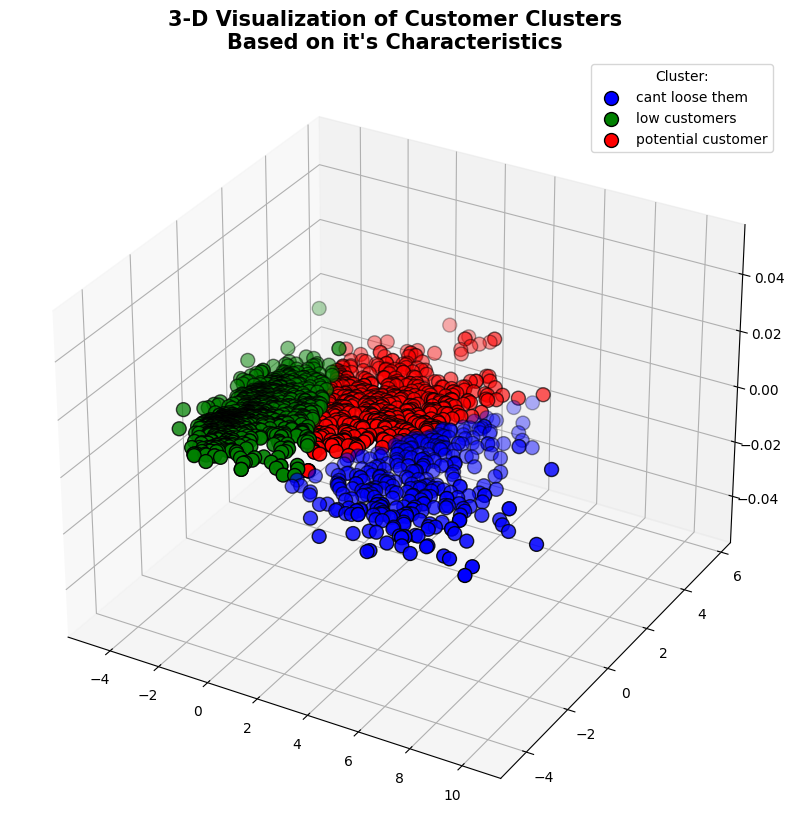

In [20]:

# Figure.
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_pca['pc0'][df_pca.cluster == 0], df_pca['pc1'][df_pca.cluster == 0], c='blue', s=100, edgecolor='black', label='cant loose them')
ax.scatter(df_pca['pc0'][df_pca.cluster == 1], df_pca['pc1'][df_pca.cluster == 1], c='green', s=100, edgecolor='black', label='low customers')
ax.scatter(df_pca['pc0'][df_pca.cluster == 2], df_pca['pc1'][df_pca.cluster == 2], c='red', s=100, edgecolor='black', label='potential customer')
plt.legend(title='Cluster:')
plt.show()

In [21]:
df4 = stats.copy()
df4['cluster_name'] = np.where(df4['cluster']==0, "Can't loose them",
                                (np.where(df4['cluster']==1,"low customer", "potensial customer")))
df4["cluster_name"].value_counts()

cluster_name
low customer          993
potensial customer    507
Can't loose them      340
Name: count, dtype: int64

### Lets find insight by cluster 

In [22]:
customer_count1 = df4.groupby("cluster_name").agg({"cluster" : "count",
                                                   "total_spent" : "mean",
                                                   "income" : "mean"}).reset_index()
customer_count1.rename(columns= {'cluster' : "total_customer",}, inplace= True)
customer_count1["percentage"] = round(customer_count1.total_customer / customer_count1.total_customer.sum() *100 , 1)
customer_count1["percentage_spent"] = round(customer_count1.total_spent / customer_count1.total_spent.sum() *100, 1)
customer_count1


,cluster_name,total_customer,total_spent,income,percentage,percentage_spent
0,Can't loose them,340,1.169791e+06,7.125030e+07,18.5,61.6
1,low customer,993,9.139074e+04,3.408885e+07,54.0,4.8
2,potensial customer,507,6.392998e+05,5.582870e+07,27.6,33.6


Text(0.5, 1.0, 'Percentage of Average Spent Cluster')

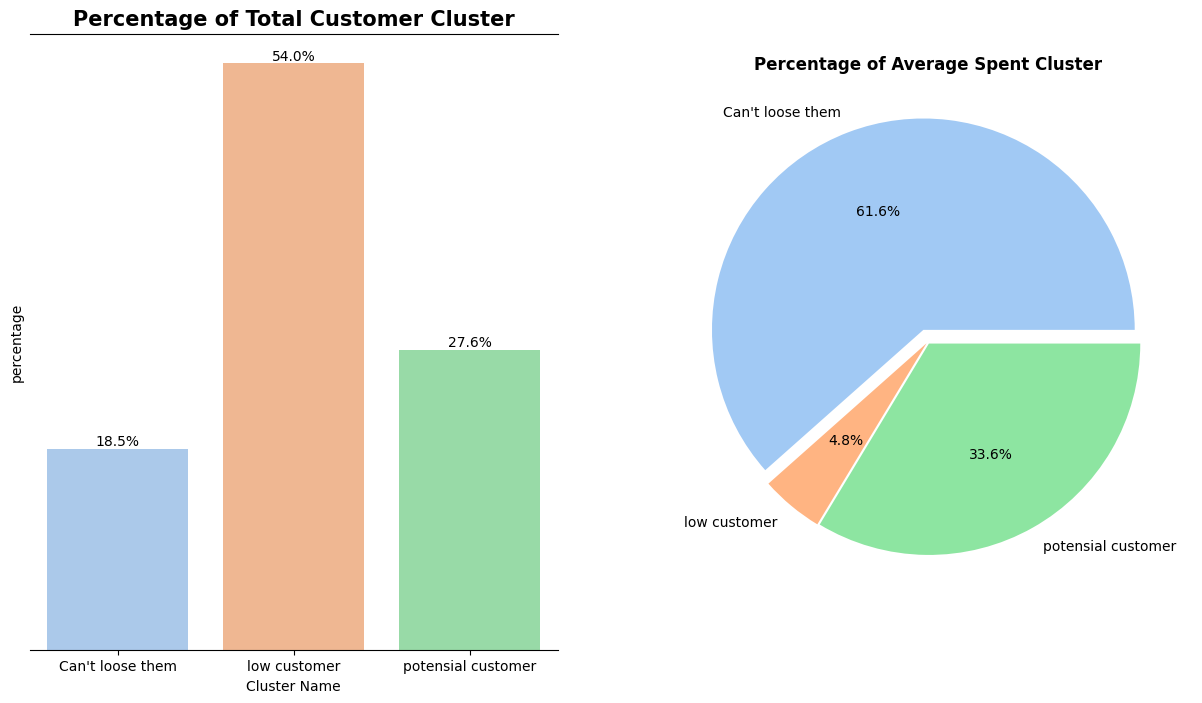

In [23]:
fig , ax = plt.subplots(1,2 ,figsize = (15,8))
plt.style.use("default")
ax[0].spines["left"].set_visible(False)
ax[0].spines["right"].set_visible(False)
a = np.arange(len(customer_count1['cluster_name']))
b = customer_count1['percentage']
c = customer_count1['total_customer']

bar = sns.barplot(x="cluster_name" , y= "percentage", data= customer_count1, palette= sns.color_palette("pastel")
                 , ax=ax[0])

ax[0].set_yticks([])
ax[0].set_xlabel("Cluster Name")

for i in bar.containers :
    ax[0].bar_label(i, fmt = "%.1f%%")

ax[1].pie(customer_count1["total_spent"], labels = customer_count1["cluster_name"], autopct='%.1f%%', explode= [0.06,0.01,0.01]
          , colors = sns.color_palette("pastel"))

ax[0].set_title("Percentage of Total Customer Cluster", fontweight = "bold", fontsize = 15)
ax[1].set_title("Percentage of Average Spent Cluster", fontweight = "bold", fontsize = 12)

Result : 
- The graph indicates that the cluster with the lowest group has the greatest percentage of customers (54%), but the average amount spent is quite low. To boost the amount spent for this cluster group, consider offering exclusive discounts to draw in cluster groups with the greatest number of customers. 
- It is evident to prospective buyers that 28% of this group's consumers have the capacity to develop into loyal customers with the proper treatment, one way to demonstrate this is by giving clients a positive shopping experience and showing gratitude through a loyalty program.
- Even though the customer group can't loose them, it has a small number of customers, but it has the highest average spent compared to other clusters.

## Univariate Analysis

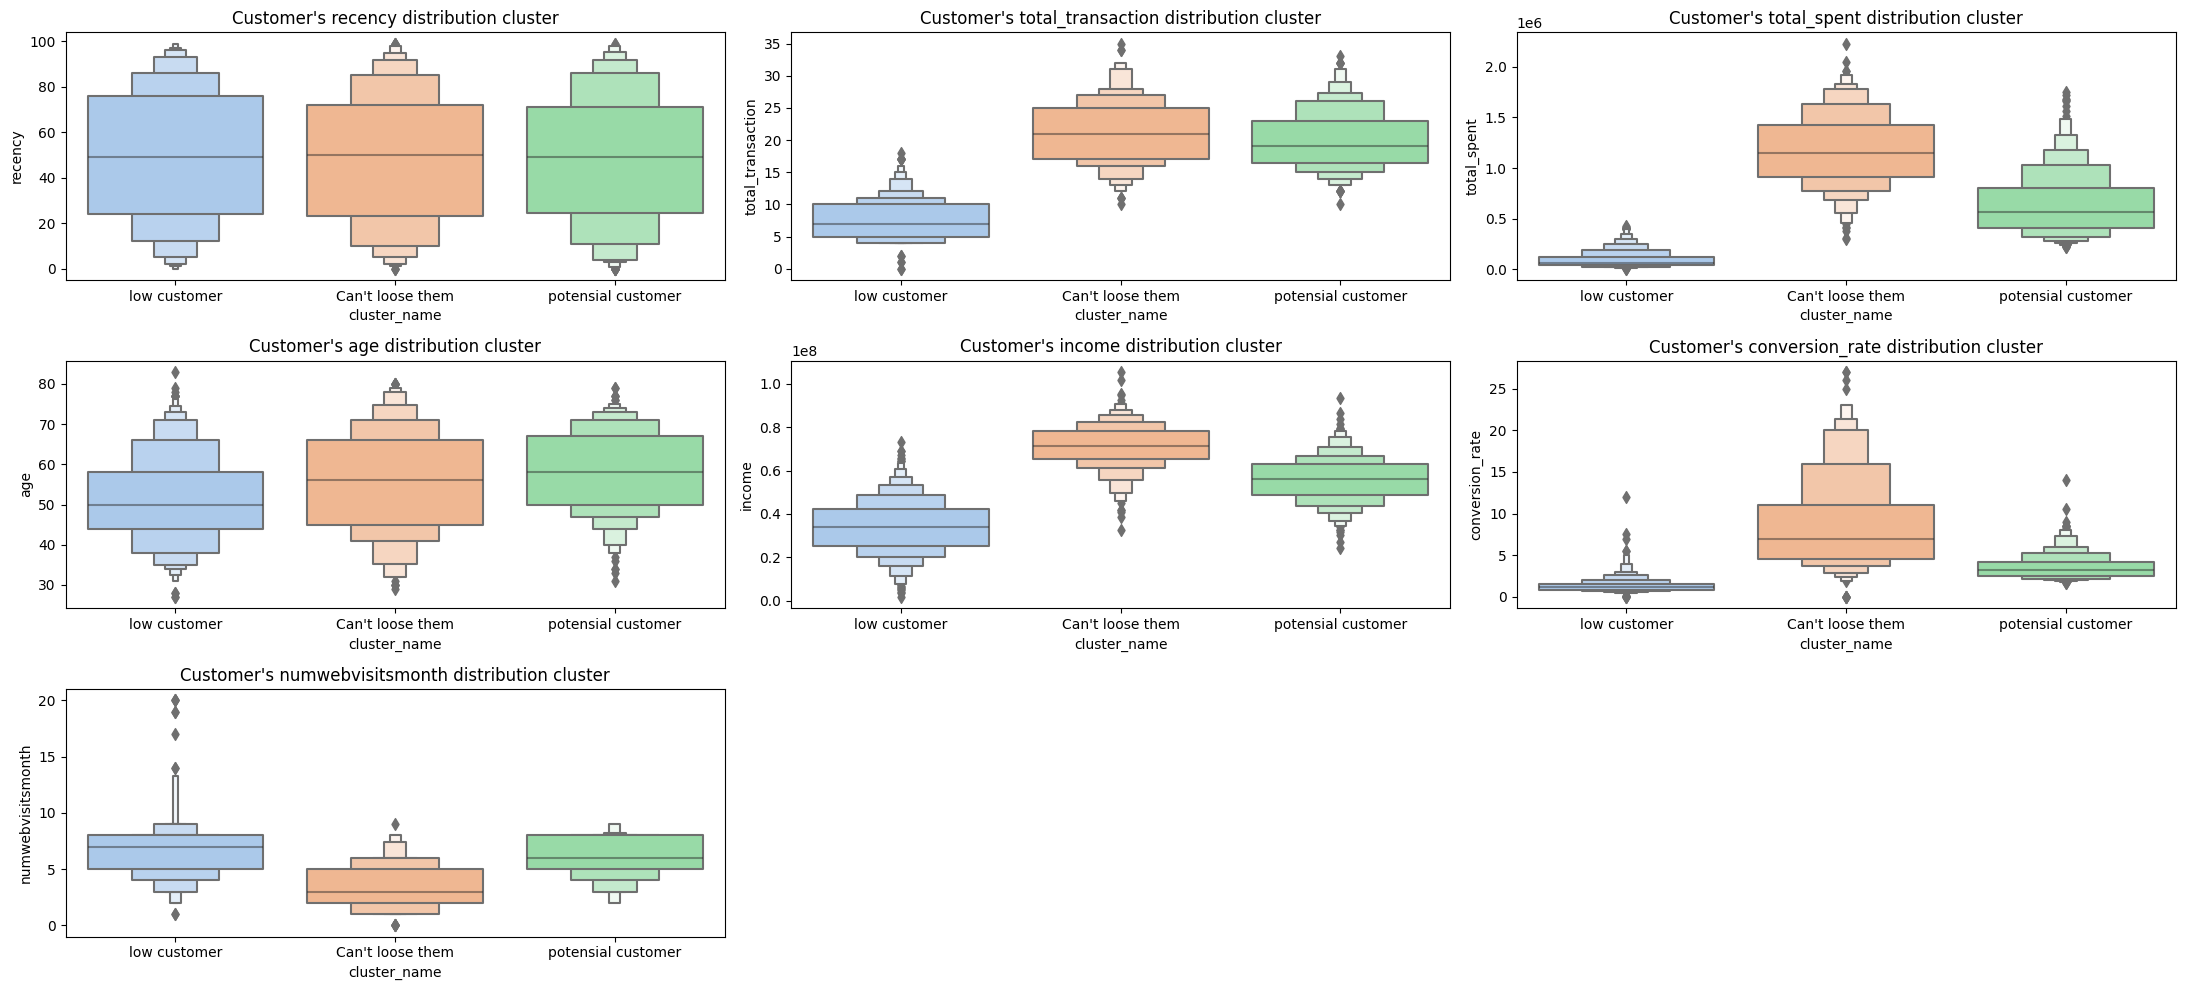

In [72]:
feature_rfm = ['recency' , 'total_transaction','total_spent'
             , 'age' ,'income','conversion_rate' ,'numwebvisitsmonth']

# distribusi cluster
color = sns.color_palette("pastel")
plt.figure(figsize=(22, 10))
for i in range(0, len(feature_rfm)):
    plt.subplot(math.ceil(len(feature_rfm)/3), 3, i+1)
    sns.boxenplot(x='cluster_name', y=feature_rfm[i], data=df4, palette= color).set(title=f'Customer\'s {feature_rfm[i]} distribution cluster')
    plt.tight_layout()

Interesting thing : 
- low customer have the lowest income, Maybe that's why the conversion rate is low.
- The three customer groups have almost the same distribution of recency.
- According to the interpretation above, website visits for low customers are the highest.

In order to maximize the business metric `GMV`, we will perform a multivariate analysis with Using simple statistical regression , to determine which features have the greatest influence with total spent feature

## multivariate analysis

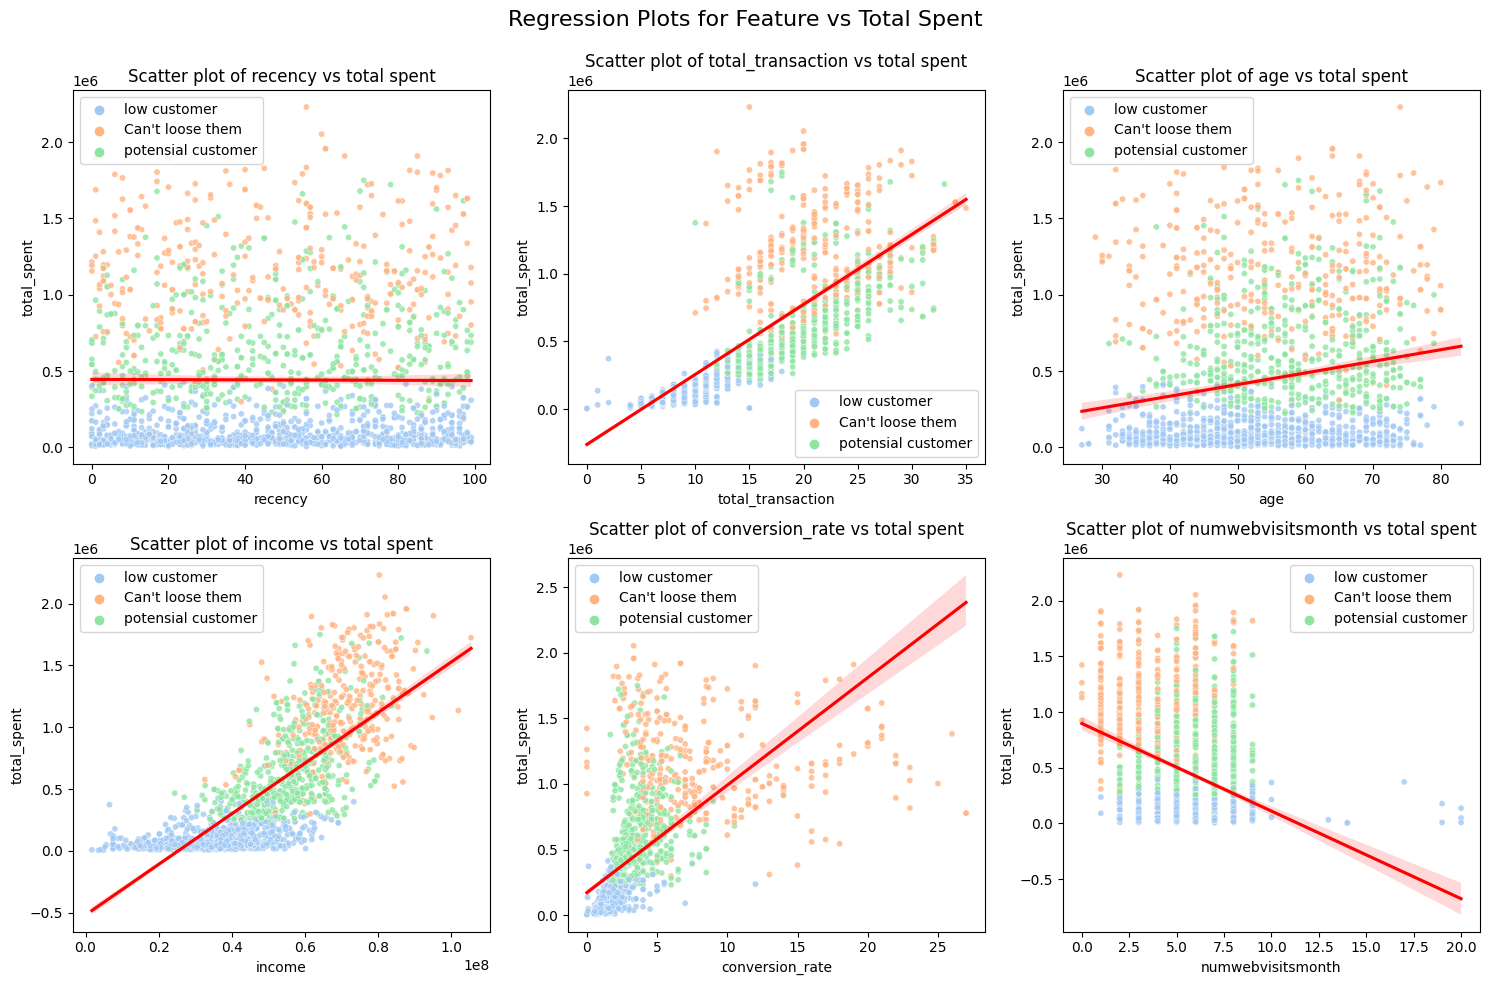

In [25]:
feature_rfm = ['recency' , 'total_transaction','age' ,'income','conversion_rate' ,'numwebvisitsmonth']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Regression Plots for Feature vs Total Spent", fontsize=16)
color = sns.color_palette("pastel")

for i, feature in enumerate(feature_rfm):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    sns.scatterplot(x=feature, y='total_spent', hue='cluster_name', data=df4, ax=ax, s=20, alpha=0.8, palette= color)
    #sns.lmplot(x=feature, y='total_spent', hue='cluster_name', data= df4, fit_reg=False, legend=False)
    sns.regplot(x=feature, y='total_spent', data=df4, ax=ax, scatter=False, color='red', scatter_kws={'s':15, 'alpha':0.01})

    ax.set_title(f'Scatter plot of {feature} vs total spent')
    ax.legend(loc='best')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## Result : 
- features such as `income`, `total_spent`, `conversion_rate` these three features have a very strong influence on spending made by customers, therefore the company can provide appropriate recommendations for these features in order to increase `GMV` according to the target .
- Another interesting finding is that features like `visit website` have a negative correlation, indicating that a significant number of users are still viewing the website but are not completing any purchases. As a result, it is imperative to evaluate the current website in order to draw in more visitors. individually to attract their interest in completing a purchase.

## Potential Impact


In [26]:
high = df4[df4['cluster_name'] == "Can't loose them"]['total_spent'].sum()
low = df4[df4['cluster_name'] == "low customer"]['total_spent'].sum()
med = df4[df4['cluster_name'] == "potensial customer"]['total_spent'].sum()
total = high + low + med
print("Total Spent Group cant' loose them: Rp.", high)
print("Total Spent Group low customer: Rp.", low)
print("Total Spent Group potensial customer: Rp.", med)
print(f'Total all cluster : Rp. {total}')

Total Spent Group cant' loose them: Rp. 397729000
Total Spent Group low customer: Rp. 90751000
Total Spent Group potensial customer: Rp. 324125000
Total all cluster : Rp. 812605000


We still have a potential gross merchandise value (`GMV`) of IDR 812,605,000 million if we can continue to prioritize our present customers and no one leaves.

## Business Recomendation

1.  `Can't Loose Them` <br>
The advice that can be given is to offer loyalty programs, such as free shipping discounts and special promotions for customer groups, because this customer group frequently makes transactions and the total amount spent is fairly high. This will help them be more satisfied with their purchases and keep their interest in the group.

2. `Low Customer` <br>
customers have the fewest spending and transactions of any group, but they have one unique characteristic they visit the website frequently so it can be advised to do an evaluation on the website to draw in this particular customer group. If needed, customer groups can also be offered small discounts to encourage more transactions, which will minimize the possibility of churn in this customer group.

3. `Potential Customer` <br>
If the company treats this customer group well, it could become the first cluster group. For example, by sending relevant and engaging messages to customers, it can guarantee a positive user experience when they visit the website or interact with the company's offerings. Developing a loyalty or incentives program helps improve client interaction. Companies may motivate potential loyal customers to keep selecting and buying their goods and services by offering them incentives like points, rewards, or exclusive advantages.


